## Proyecto Final - Fundamentos de Analítica l

### Universidad Icesi - Maestria en Ciencia de Datos
#### Profesor: Annibal Sosa

##### Presentado por:

- Melina Ortiz
- Jefferson Rua 
- Daniel Castaño

### **Introducción:**

A continuación trabajaremos con el conjunto de datos (imports-85.data), donde analizaremos tres tipos de entidades:

- La especificación de un automóvil en términos de varias características
- Su calificación de riesgo de seguro asignada
- Sus pérdidas de uso normalizadas en comparación con otros automóviles.

La calificación corresponde al grado en que el auto sea más riesgoso asociado con su precio. Luego, si es de mayor riesgo (o de menor), se ajusta este símbolo moviéndolo hacia la derecha (o hacia la izquierda) en la escala. Los actuarios llaman a este proceso "simbolización". En este sentido, un valor de +3 indica que el auto es riesgoso, mientras que un valor de -3 significa que probablemente sea bastante seguro. El tercer factor es el pago de pérdida promedio relativo por año de vehículo asegurado. Este valor está normalizado para todos los autos dentro de una clasificación de tamaño particular para todos los autos dentro de una clasificación de tamaño particular (pequeño de dos puertas, familiar, deportivo/especial, etc.), y representa la pérdida promedio por auto por año.



### **Objetivo de negocio:**

El objetivo de negocio definido para este proyecto es predecir la calificación de riesgo de seguro de un automóvil, además, caracterizar los diferentes segmentos de la población.

In [146]:
###Importamos las librerias y recursos que utilizaremos para el desarrollo de este proyecto

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter
from time import time


from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator


import warnings




### **Parte 1 | Limpieza y EDA:** 

Se comprobará si hay problemas de calidad de los datos.
Se evaluaran la calidad de los datos, y se realizará una comprensión sobre la relación entre las características y la variable de destino.

In [2]:
##Cargamos el data set con el que vamos a explorar

data2 = pd.read_csv("imports-85.data", header=None)

In [3]:
## Revisamos los primeros datos, para ver cómo están
data2.head(10)

0    1            2    3      4     5            6    7      8      9   \
0   3    ?  alfa-romero  gas    std   two  convertible  rwd  front   88.6   
1   3    ?  alfa-romero  gas    std   two  convertible  rwd  front   88.6   
2   1    ?  alfa-romero  gas    std   two    hatchback  rwd  front   94.5   
3   2  164         audi  gas    std  four        sedan  fwd  front   99.8   
4   2  164         audi  gas    std  four        sedan  4wd  front   99.4   
5   2    ?         audi  gas    std   two        sedan  fwd  front   99.8   
6   1  158         audi  gas    std  four        sedan  fwd  front  105.8   
7   1    ?         audi  gas    std  four        wagon  fwd  front  105.8   
8   1  158         audi  gas  turbo  four        sedan  fwd  front  105.8   
9   0    ?         audi  gas  turbo   two    hatchback  4wd  front   99.5   

   ...   16    17    18    19    20   21    22  23  24     25  
0  ...  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  ...  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  ...  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  ...  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  ...  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
5  ...  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  
6  ...  136  mpfi  3.19  3.40   8.5  110  5500  19  25  17710  
7  ...  136  mpfi  3.19  3.40   8.5  110  5500  19  25  18920  
8  ...  131  mpfi  3.13  3.40   8.3  140  5500  17  20  23875  
9  ...  131  mpfi  3.13  3.40   7.0  160  5500  16  22      ?  

[10 rows x 26 columns]

Los datos no tienen nombres de sus atributos, vamos asignarle los nombres. Adcionalmente, se ve que algunos valores se encuentran sin datos "?", vamos asignarle Nan a estos datos para que sea más fácil manipularlos

In [4]:
##Teniendo en cuenta la guía de estudio, se asignan los nombres de las columnas
data2.columns = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
    "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"
]


In [5]:
# Reemplazar los valores "?" por NaN
data2.replace("?", np.nan, inplace=True)

In [6]:
data2.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [7]:
data2.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

Se observan varios datos nulos, especialmente en la variable "normalized-losses"

In [8]:
##verifiquemos la calidad de los datos
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
#Resumen Missing values
data2.isna().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
# Convertir las columnas numéricas a tipo float
num_cols = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore",
            "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
data2[num_cols] = data2[num_cols].astype(float)

In [11]:
data2.head(10)

symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   
5          2                NaN         audi       gas        std   
6          1              158.0         audi       gas        std   
7          1                NaN         audi       gas        std   
8          1              158.0         audi       gas      turbo   
9          0                NaN         audi       gas      turbo   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   
5          two        sedan          fwd           front        99.8  ...   
6         four        sedan          fwd           front       105.8  ...   
7         four        wagon          fwd           front       105.8  ...   
8         four        sedan          fwd           front       105.8  ...   
9          two    hatchback          4wd           front        99.5  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0        130.0         mpfi  3.47    2.68               9.0      111.0   
1        130.0         mpfi  3.47    2.68               9.0      111.0   
2        152.0         mpfi  2.68    3.47               9.0      154.0   
3        109.0         mpfi  3.19    3.40              10.0      102.0   
4        136.0         mpfi  3.19    3.40               8.0      115.0   
5        136.0         mpfi  3.19    3.40               8.5      110.0   
6        136.0         mpfi  3.19    3.40               8.5      110.0   
7        136.0         mpfi  3.19    3.40               8.5      110.0   
8        131.0         mpfi  3.13    3.40               8.3      140.0   
9        131.0         mpfi  3.13    3.40               7.0      160.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0     21.0         27.0  13495.0  
1    5000.0     21.0         27.0  16500.0  
2    5000.0     19.0         26.0  16500.0  
3    5500.0     24.0         30.0  13950.0  
4    5500.0     18.0         22.0  17450.0  
5    5500.0     19.0         25.0  15250.0  
6    5500.0     19.0         25.0  17710.0  
7    5500.0     19.0         25.0  18920.0  
8    5500.0     17.0         20.0  23875.0  
9    5500.0     16.0         22.0      NaN  

[10 rows x 26 columns]

Propongo reemplazar los valores nulos de las variables numéricas, por la mediana de los datos de cada comlumna, esto para no tener que eliminar datos. Y para el caso de la variable categorica, reemplazar los missing values por la moda.
Este proceso es conocido como una imputación simple.

En el caso de la variable "normalized-losses", como tiene 41 valores nulos, se puede considerar la imputación simple usando la mediana de los valores disponibles. Es importante evaluar si estos valores nulos están distribuidos al azar o si hay algún patrón en su distribución, ya que esto puede afectar la elección del método de imputación.

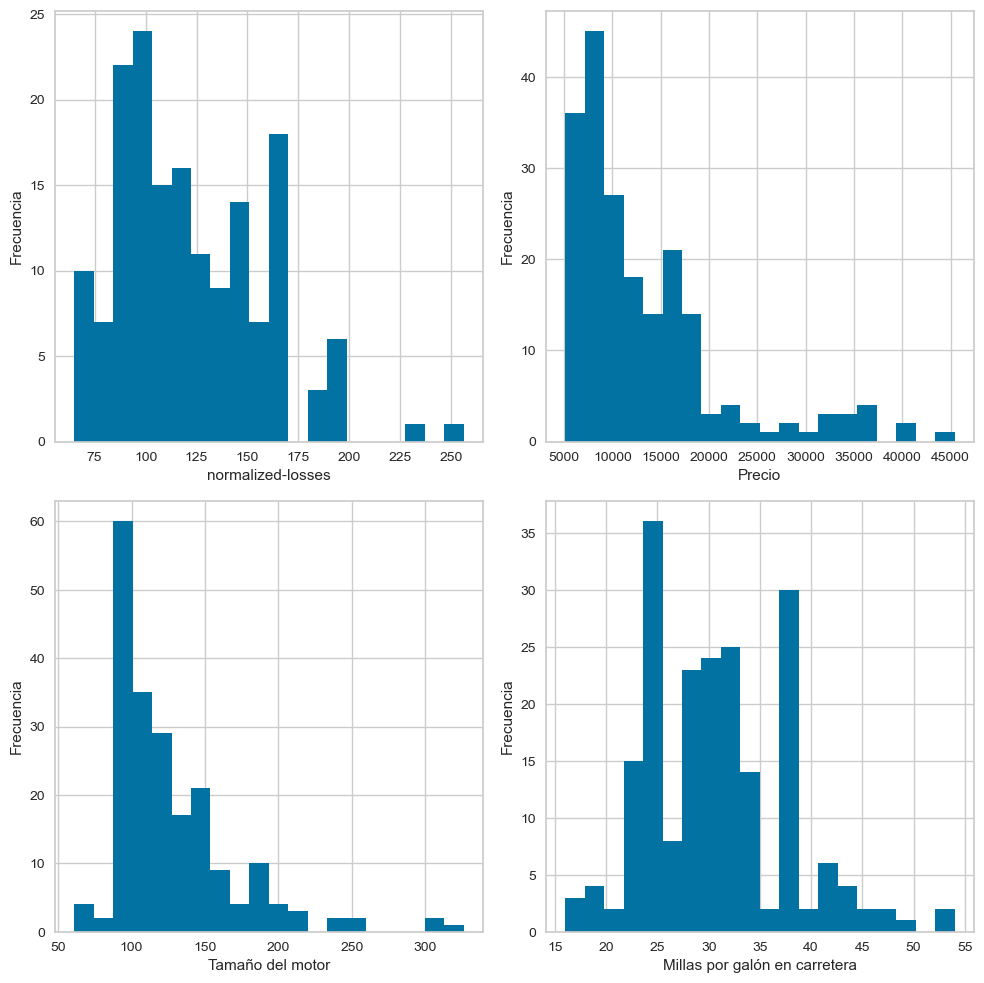

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].hist(data2["normalized-losses"], bins=20)
axes[0, 0].set_xlabel("normalized-losses")
axes[0, 0].set_ylabel("Frecuencia")

axes[0, 1].hist(data2["price"], bins=20)
axes[0, 1].set_xlabel("Precio")
axes[0, 1].set_ylabel("Frecuencia")

axes[1, 0].hist(data2["engine-size"], bins=20)
axes[1, 0].set_xlabel("Tamaño del motor")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].hist(data2["highway-mpg"], bins=20)
axes[1, 1].set_xlabel("Millas por galón en carretera")
axes[1, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [13]:
## Calcular la medio de la columna "normalized-losses"
normalized_losses_median = data2["normalized-losses"].median()

##Reemplazo los valores nulos con la mediana:

data3 = data2["normalized-losses"].fillna(normalized_losses_median, inplace=True)

In [14]:
data2["normalized-losses"].isnull().sum()

0

In [15]:
## utilizaremos este proceso para el resto de variables numéricas del data set
data2.fillna(data2.median(), inplace=True)

C:\Users\decas\AppData\Local\Temp\ipykernel_6484\871276674.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.fillna(data2.median(), inplace=True)


In [16]:
# Ocultar todos los mensajes de advertencia
warnings.filterwarnings('ignore')

In [17]:
## para el caso de la variable categórica, se reemplazaran los Missing values por la Moda
data2["num-of-doors"].replace(np.nan, data2["num-of-doors"].mode()[0], inplace = True)


In [18]:
##verifiquemos nuevamente la calidad de los datos
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Observemos que todos los datos nulos fueron reemplazados por sus respectivas medias


In [19]:
data2

symboling  normalized-losses         make fuel-type aspiration  \
0            3              115.0  alfa-romero       gas        std   
1            3              115.0  alfa-romero       gas        std   
2            1              115.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130.0         mpfi  3.47    2.68               9.0      111.0   
1          130.0         mpfi  3.47    2.68               9.0      111.0   
2          152.0         mpfi  2.68    3.47               9.0      154.0   
3          109.0         mpfi  3.19    3.40              10.0      102.0   
4          136.0         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
200        141.0         mpfi  3.78    3.15               9.5      114.0   
201        141.0         mpfi  3.78    3.15               8.7      160.0   
202        173.0         mpfi  3.58    2.87               8.8      134.0   
203        145.0          idi  3.01    3.40              23.0      106.0   
204        141.0         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0     21.0         27.0  13495.0  
1      5000.0     21.0         27.0  16500.0  
2      5000.0     19.0         26.0  16500.0  
3      5500.0     24.0         30.0  13950.0  
4      5500.0     18.0         22.0  17450.0  
..        ...      ...          ...      ...  
200    5400.0     23.0         28.0  16845.0  
201    5300.0     19.0         25.0  19045.0  
202    5500.0     18.0         23.0  21485.0  
203    4800.0     26.0         27.0  22470.0  
204    5400.0     19.0         25.0  22625.0  

[205 rows x 26 columns]

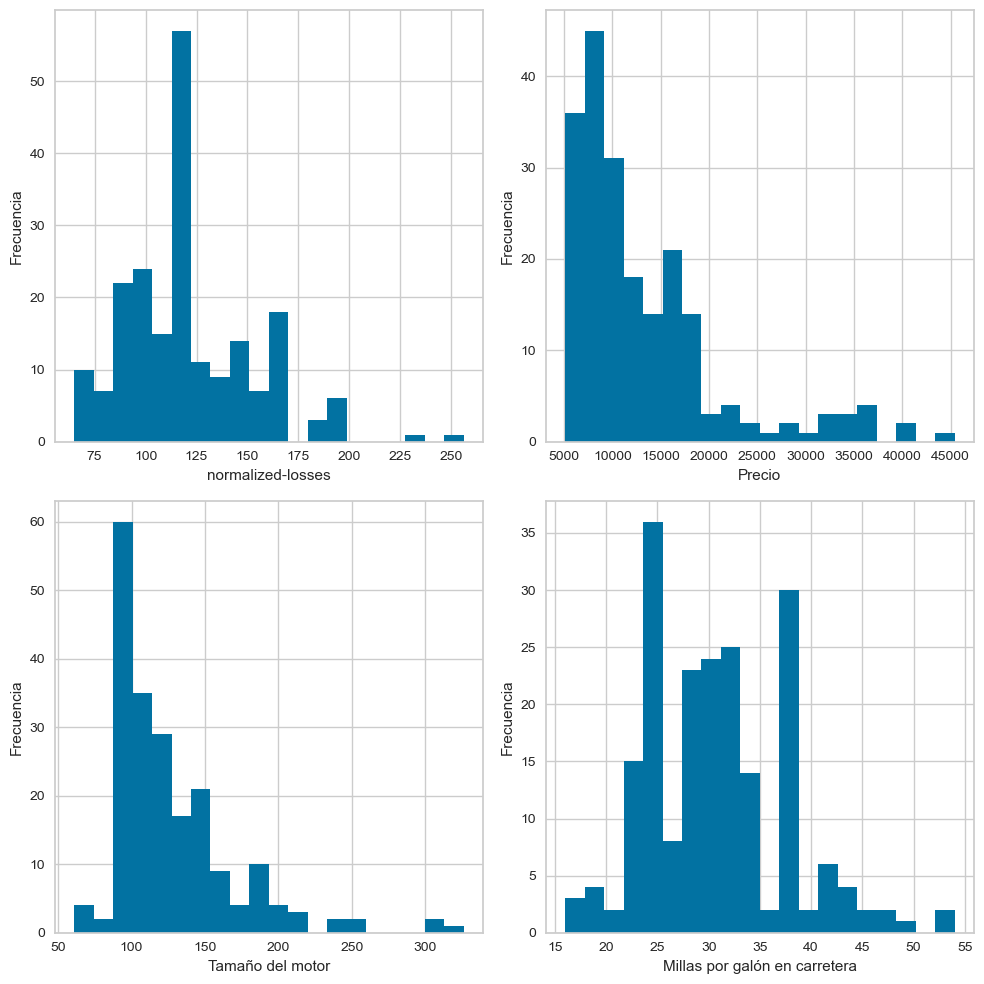

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].hist(data2["normalized-losses"], bins=20)
axes[0, 0].set_xlabel("normalized-losses")
axes[0, 0].set_ylabel("Frecuencia")

axes[0, 1].hist(data2["price"], bins=20)
axes[0, 1].set_xlabel("Precio")
axes[0, 1].set_ylabel("Frecuencia")

axes[1, 0].hist(data2["engine-size"], bins=20)
axes[1, 0].set_xlabel("Tamaño del motor")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].hist(data2["highway-mpg"], bins=20)
axes[1, 1].set_xlabel("Millas por galón en carretera")
axes[1, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Dado que la variable "Normalized-losses" preseta tantos missing values, al momento de hacer el proceso de imputación por la mediana de los datos, se observa que se genera una gran concentración de datos en un mismo punto. Esto generará un sesgo con esta variable. Por lo cual, se toma la decisión de descartar esta variable y conservar las otras variables que tienen pocos missing values como "bore", "stroke" y "price"

In [21]:
#Revisando número de valores únicos por variable
data2.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [22]:
## Indicamos cuales son las columnas categoricas para transformar a ordinales
object_cols = [col for col in data2.columns if data2[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(data2[col]).issubset(set(data2[col]))]
print('Columnas categóricas que se codificarán en ordinal:', good_label_cols)

Columnas categóricas que se codificarán en ordinal: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [23]:
##Revisamos los valores Unicos de las variables categoricas
printf = 'Valor unico {}:\n {} \n'
for count, i in enumerate(good_label_cols):
    val_count = data2['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Valor unico make:
 toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64 

1 Valor unico fuel-type:
 gas       185
diesel     20
Name: fuel-type, dtype: int64 

2 Valor unico aspiration:
 std      168
turbo     37
Name: aspiration, dtype: int64 

3 Valor unico num-of-doors:
 four    116
two      89
Name: num-of-doors, dtype: int64 

4 Valor unico body-style:
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64 

5 Valor unico drive-wheels:
 fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64 

6 Val

In [24]:
data2.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         120.600000   98.756585  174.049268   65.907805   
std      1.245307          31.805105    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   126.907317    3.329366    3.256098   
std      2.443522   520.680204    41.642693    0.270858    0.313634   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.580000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  205.000000   205.000000  205.000000   205.000000   
mean           10.142537  104.165854  5126.097561   25.219512    30.751220   
std             3.972040   39.529733   477.035772    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    205.000000  
mean   13150.307317  
std     7879.121326  
min     5118.000000  
25%     7788.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

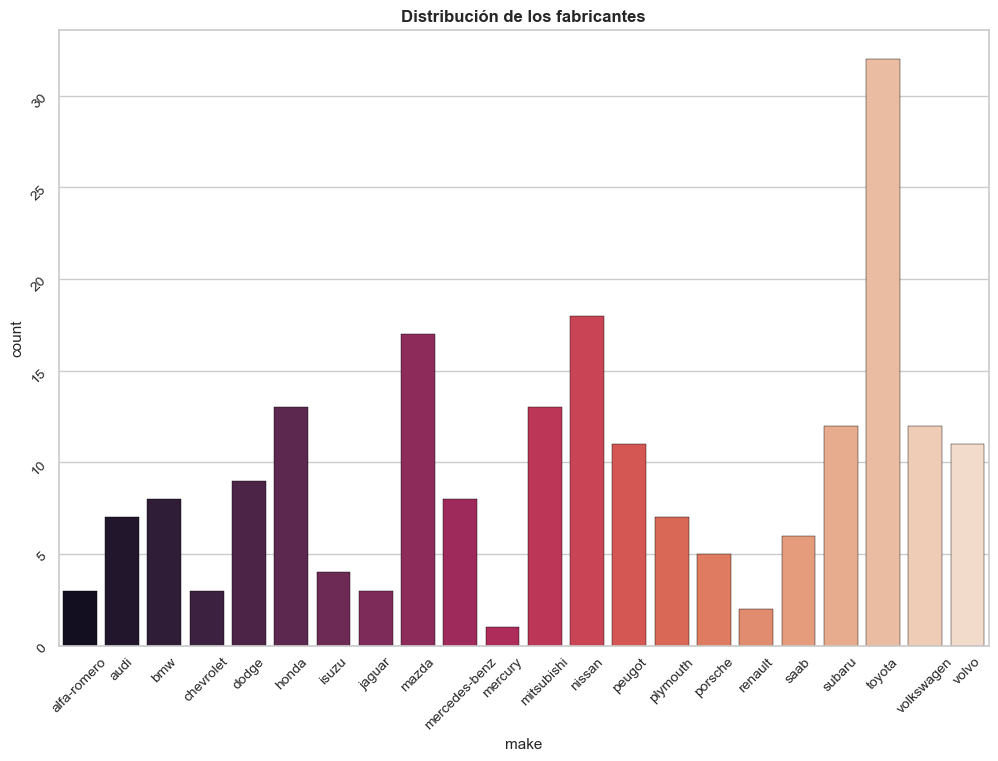

In [25]:
##Graficar la variable "Make"
plt.figure(figsize=(12,8))
sns.countplot(x="make",data=data2,palette="rocket",edgecolor="black")
plt.title('Distribución de los fabricantes', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

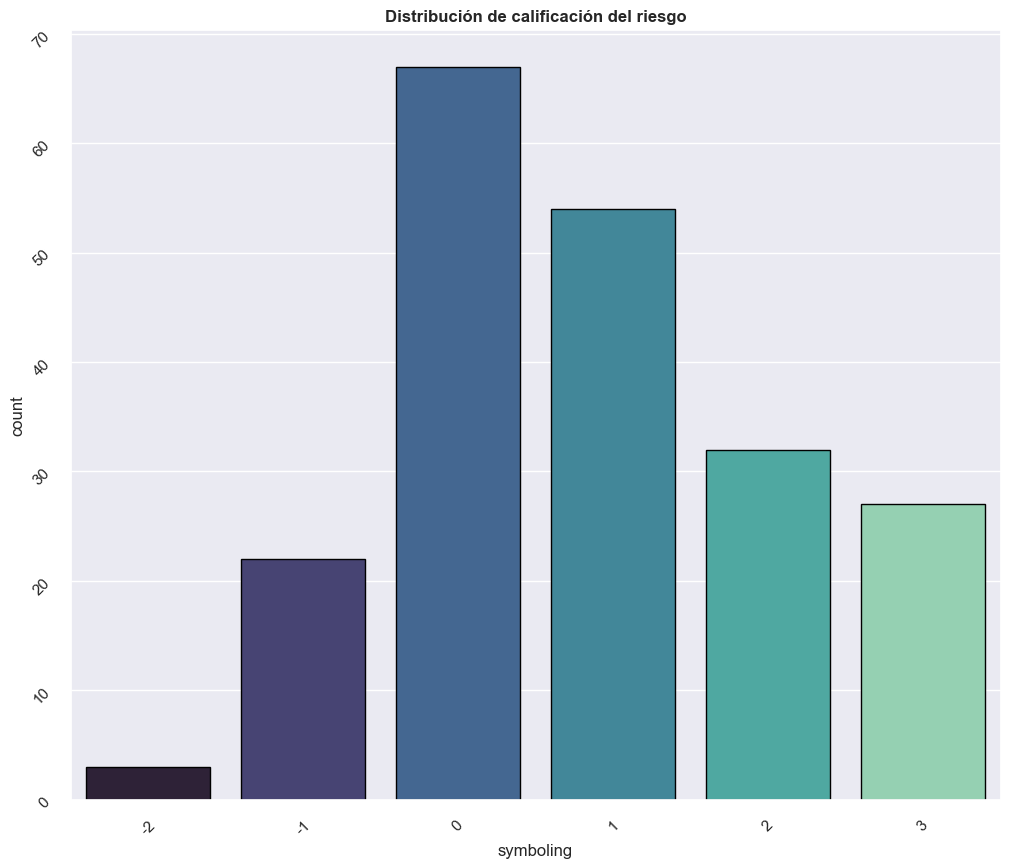

In [26]:
##Graficar la variable "symboling"
plt.figure(figsize=(12,10))
sns.countplot(x="symboling",data=data2,palette="mako",edgecolor="black")
plt.title('Distribución de calificación del riesgo', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

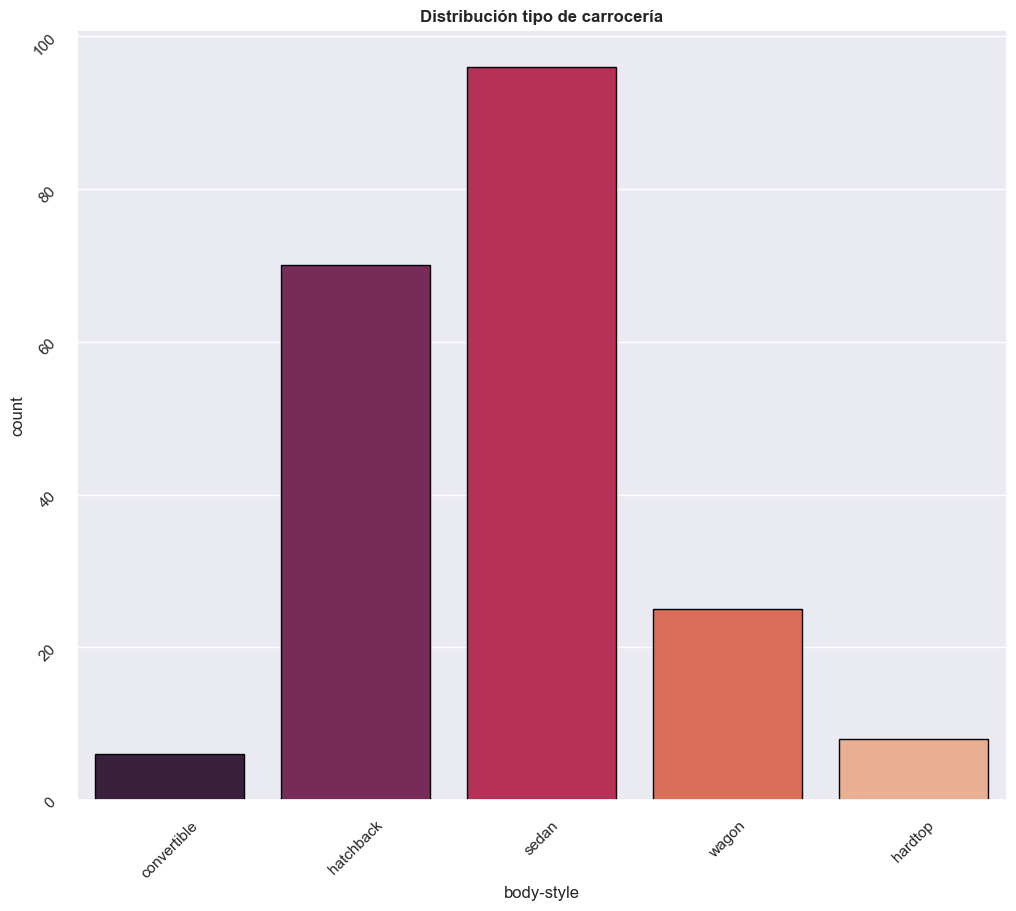

In [27]:
##Graficar la variable "body-style"
plt.figure(figsize=(12,10))
sns.countplot(x="body-style",data=data2,palette="rocket", edgecolor="black")
plt.title('Distribución tipo de carrocería', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

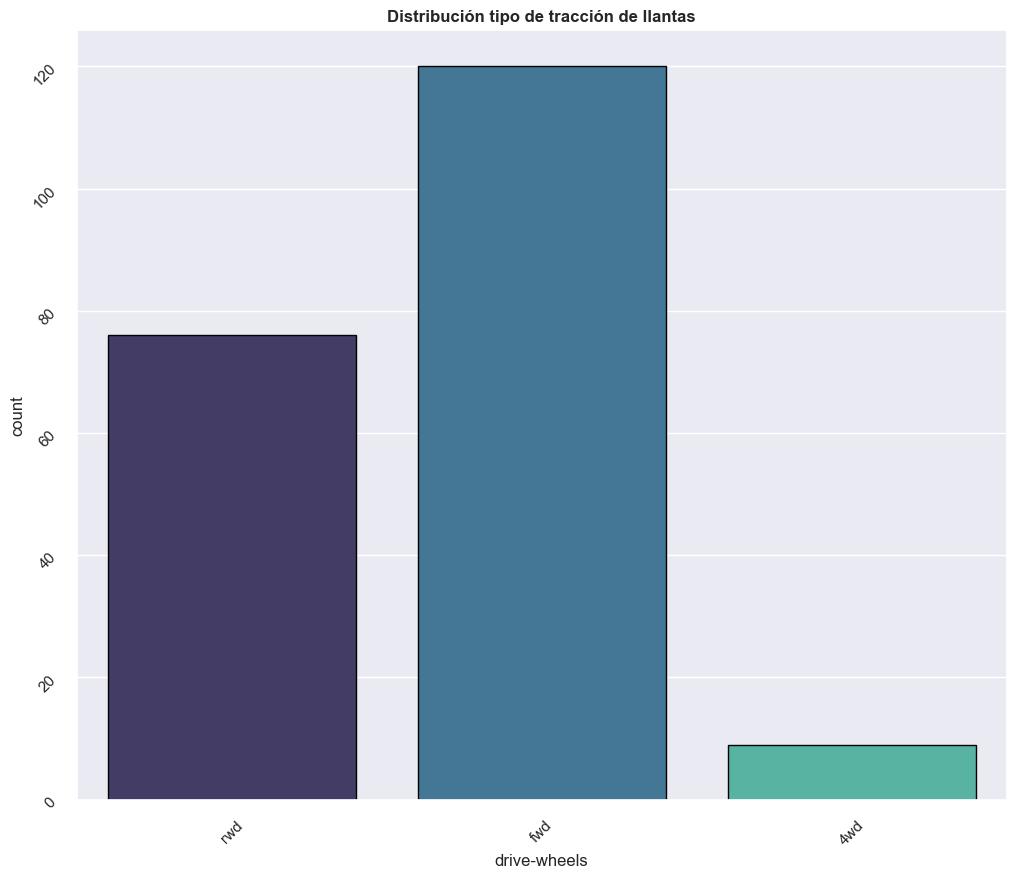

In [28]:
##Graficar la variable "drive-wheels"
plt.figure(figsize=(12,10))
sns.countplot(x="drive-wheels",data=data2,palette="mako",edgecolor="black")
plt.title('Distribución tipo de tracción de llantas', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

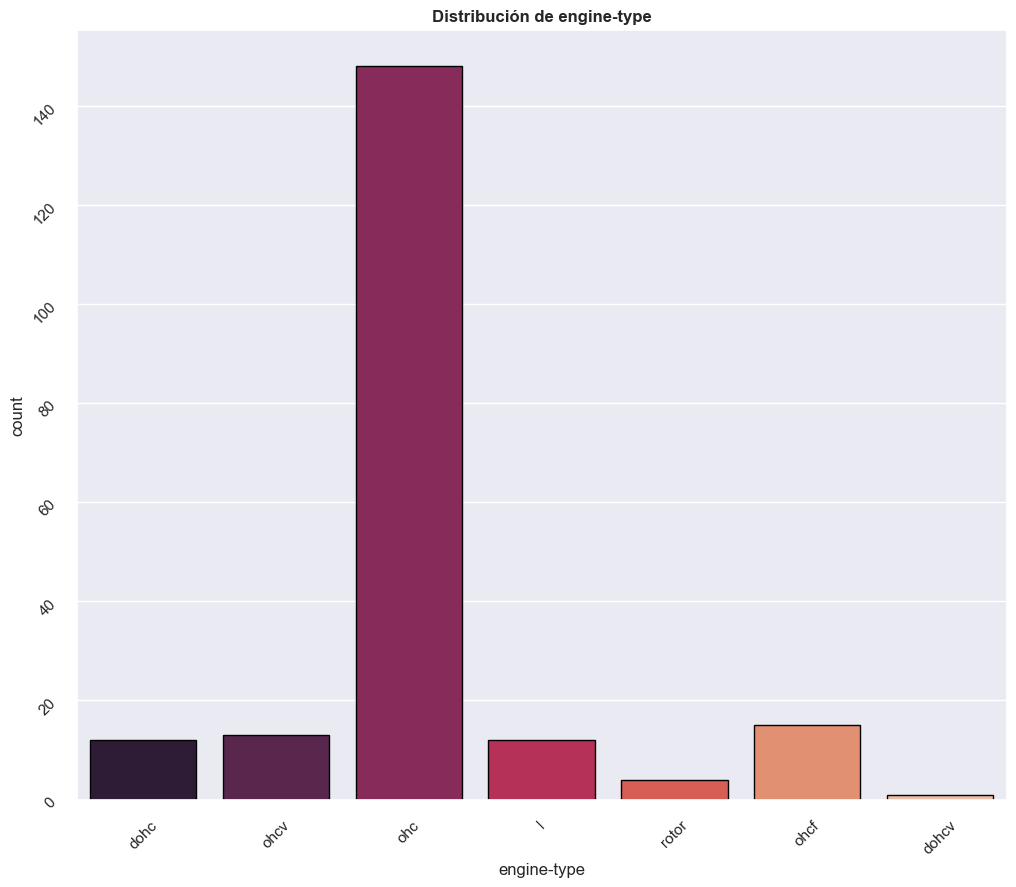

In [29]:
##Graficar la variable "engine-type"
plt.figure(figsize=(12,10))
sns.countplot(x="engine-type",data=data2,palette="rocket",edgecolor="black")
plt.title('Distribución de engine-type', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

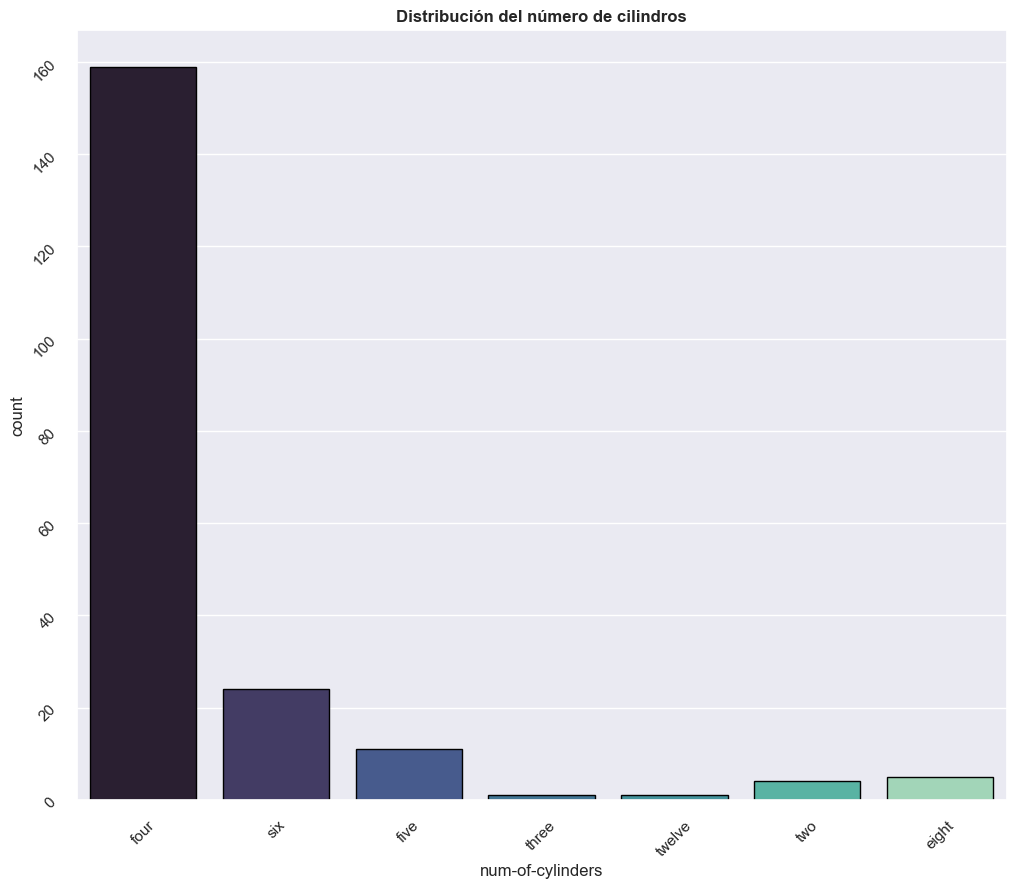

In [30]:
##Graficar la variable "num-of-cylinders"
plt.figure(figsize=(12,10))
sns.countplot(x="num-of-cylinders",data=data2,palette="mako",edgecolor="black")
plt.title('Distribución del número de cilindros', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

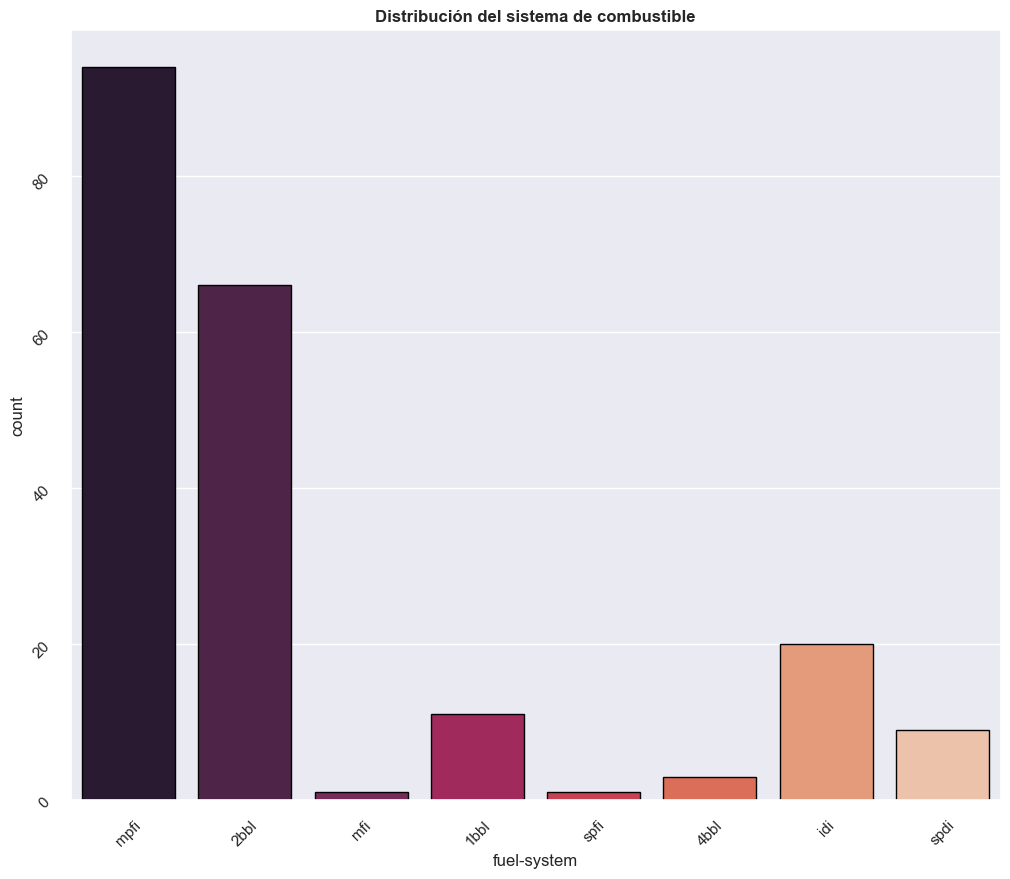

In [31]:
##Graficar la variable "fuel-system"
plt.figure(figsize=(12,10))
sns.countplot(x="fuel-system",data=data2,palette="rocket",edgecolor="black")
plt.title('Distribución del sistema de combustible', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# cambiar el font size
sns.set(font_scale=1)

Text(0.5, 1.0, 'Precio vs tipo de carrocería (boxplot)')

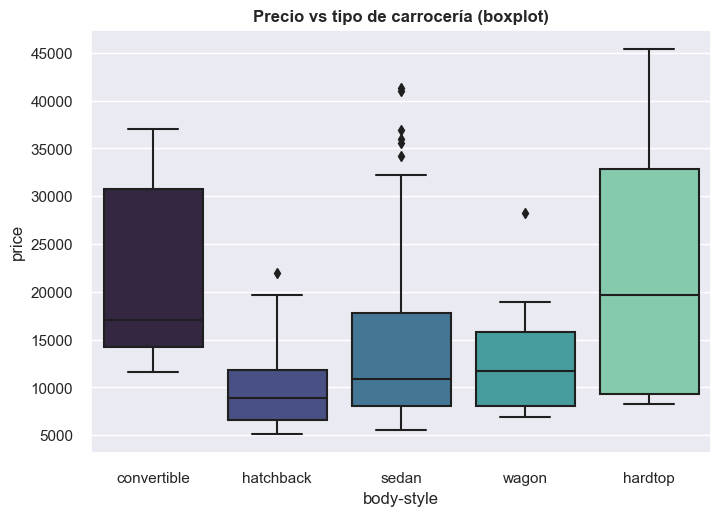

In [32]:
### Precio vs calificación de riesgo del automóvil 
sns.boxplot(x="body-style", y="price", data=data2, palette="mako" )
plt.title('Precio vs tipo de carrocería (boxplot)', weight='bold')

Text(0.5, 1.0, 'Perdidas normalizadas vs calificación de riesgo (boxplot)')

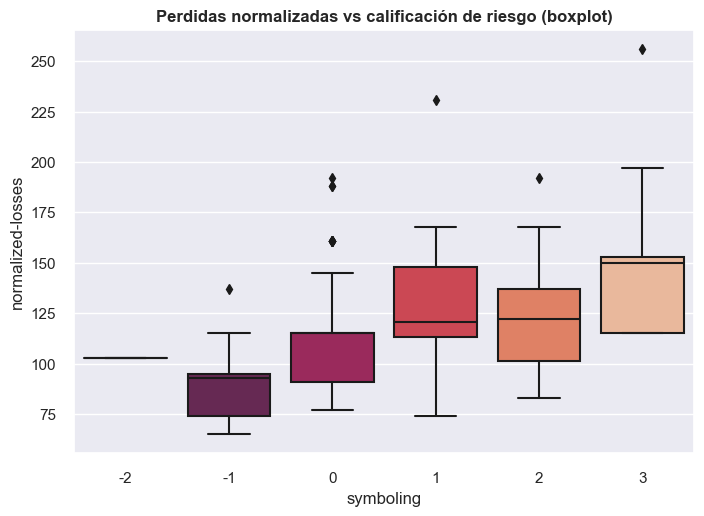

In [33]:
### Perdidas normalizadas vs calificación de riesgo del automóvil 
sns.boxplot(x="symboling", y="normalized-losses", data=data2, palette="rocket" )
plt.title('Perdidas normalizadas vs calificación de riesgo (boxplot)', weight='bold')

A simple vista podríamos decir que en la medida que un carro tiene unas perdidas normalizadas más altas, el riesgo del seguro es más alto. Sin embargo, cuando el riesgo es "1" vemos que las perdidas normalizadas son inclusive más altas que cuando el riesgo es "2". Este sesgo podría haber ocurrido por los missings values que se imputaron con la media, es por esta razón que no es conveniente utilizar esta variable.

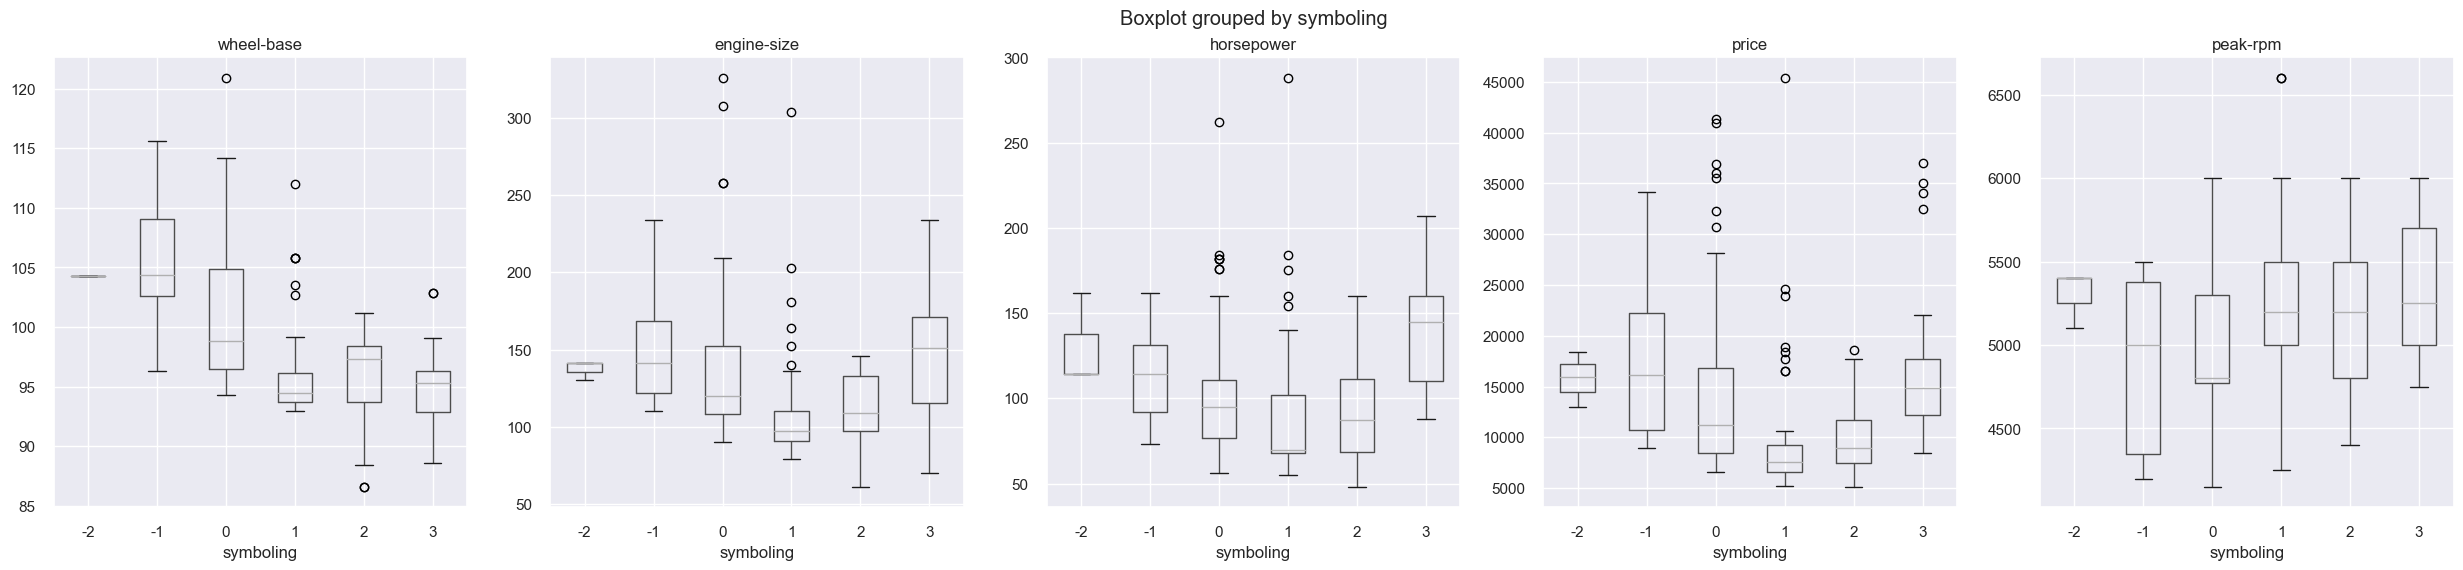

In [34]:
## Grafica resumida de Calificación de riesgo vs wheel-base, engine-size, horsepower, price, peak-rpm

fig, axs = plt.subplots(1,5, figsize=(30, 6))
bp = data2.boxplot(by='symboling', column = ['wheel-base', 'engine-size', 'horsepower', 'price', 'peak-rpm'], ax = axs)

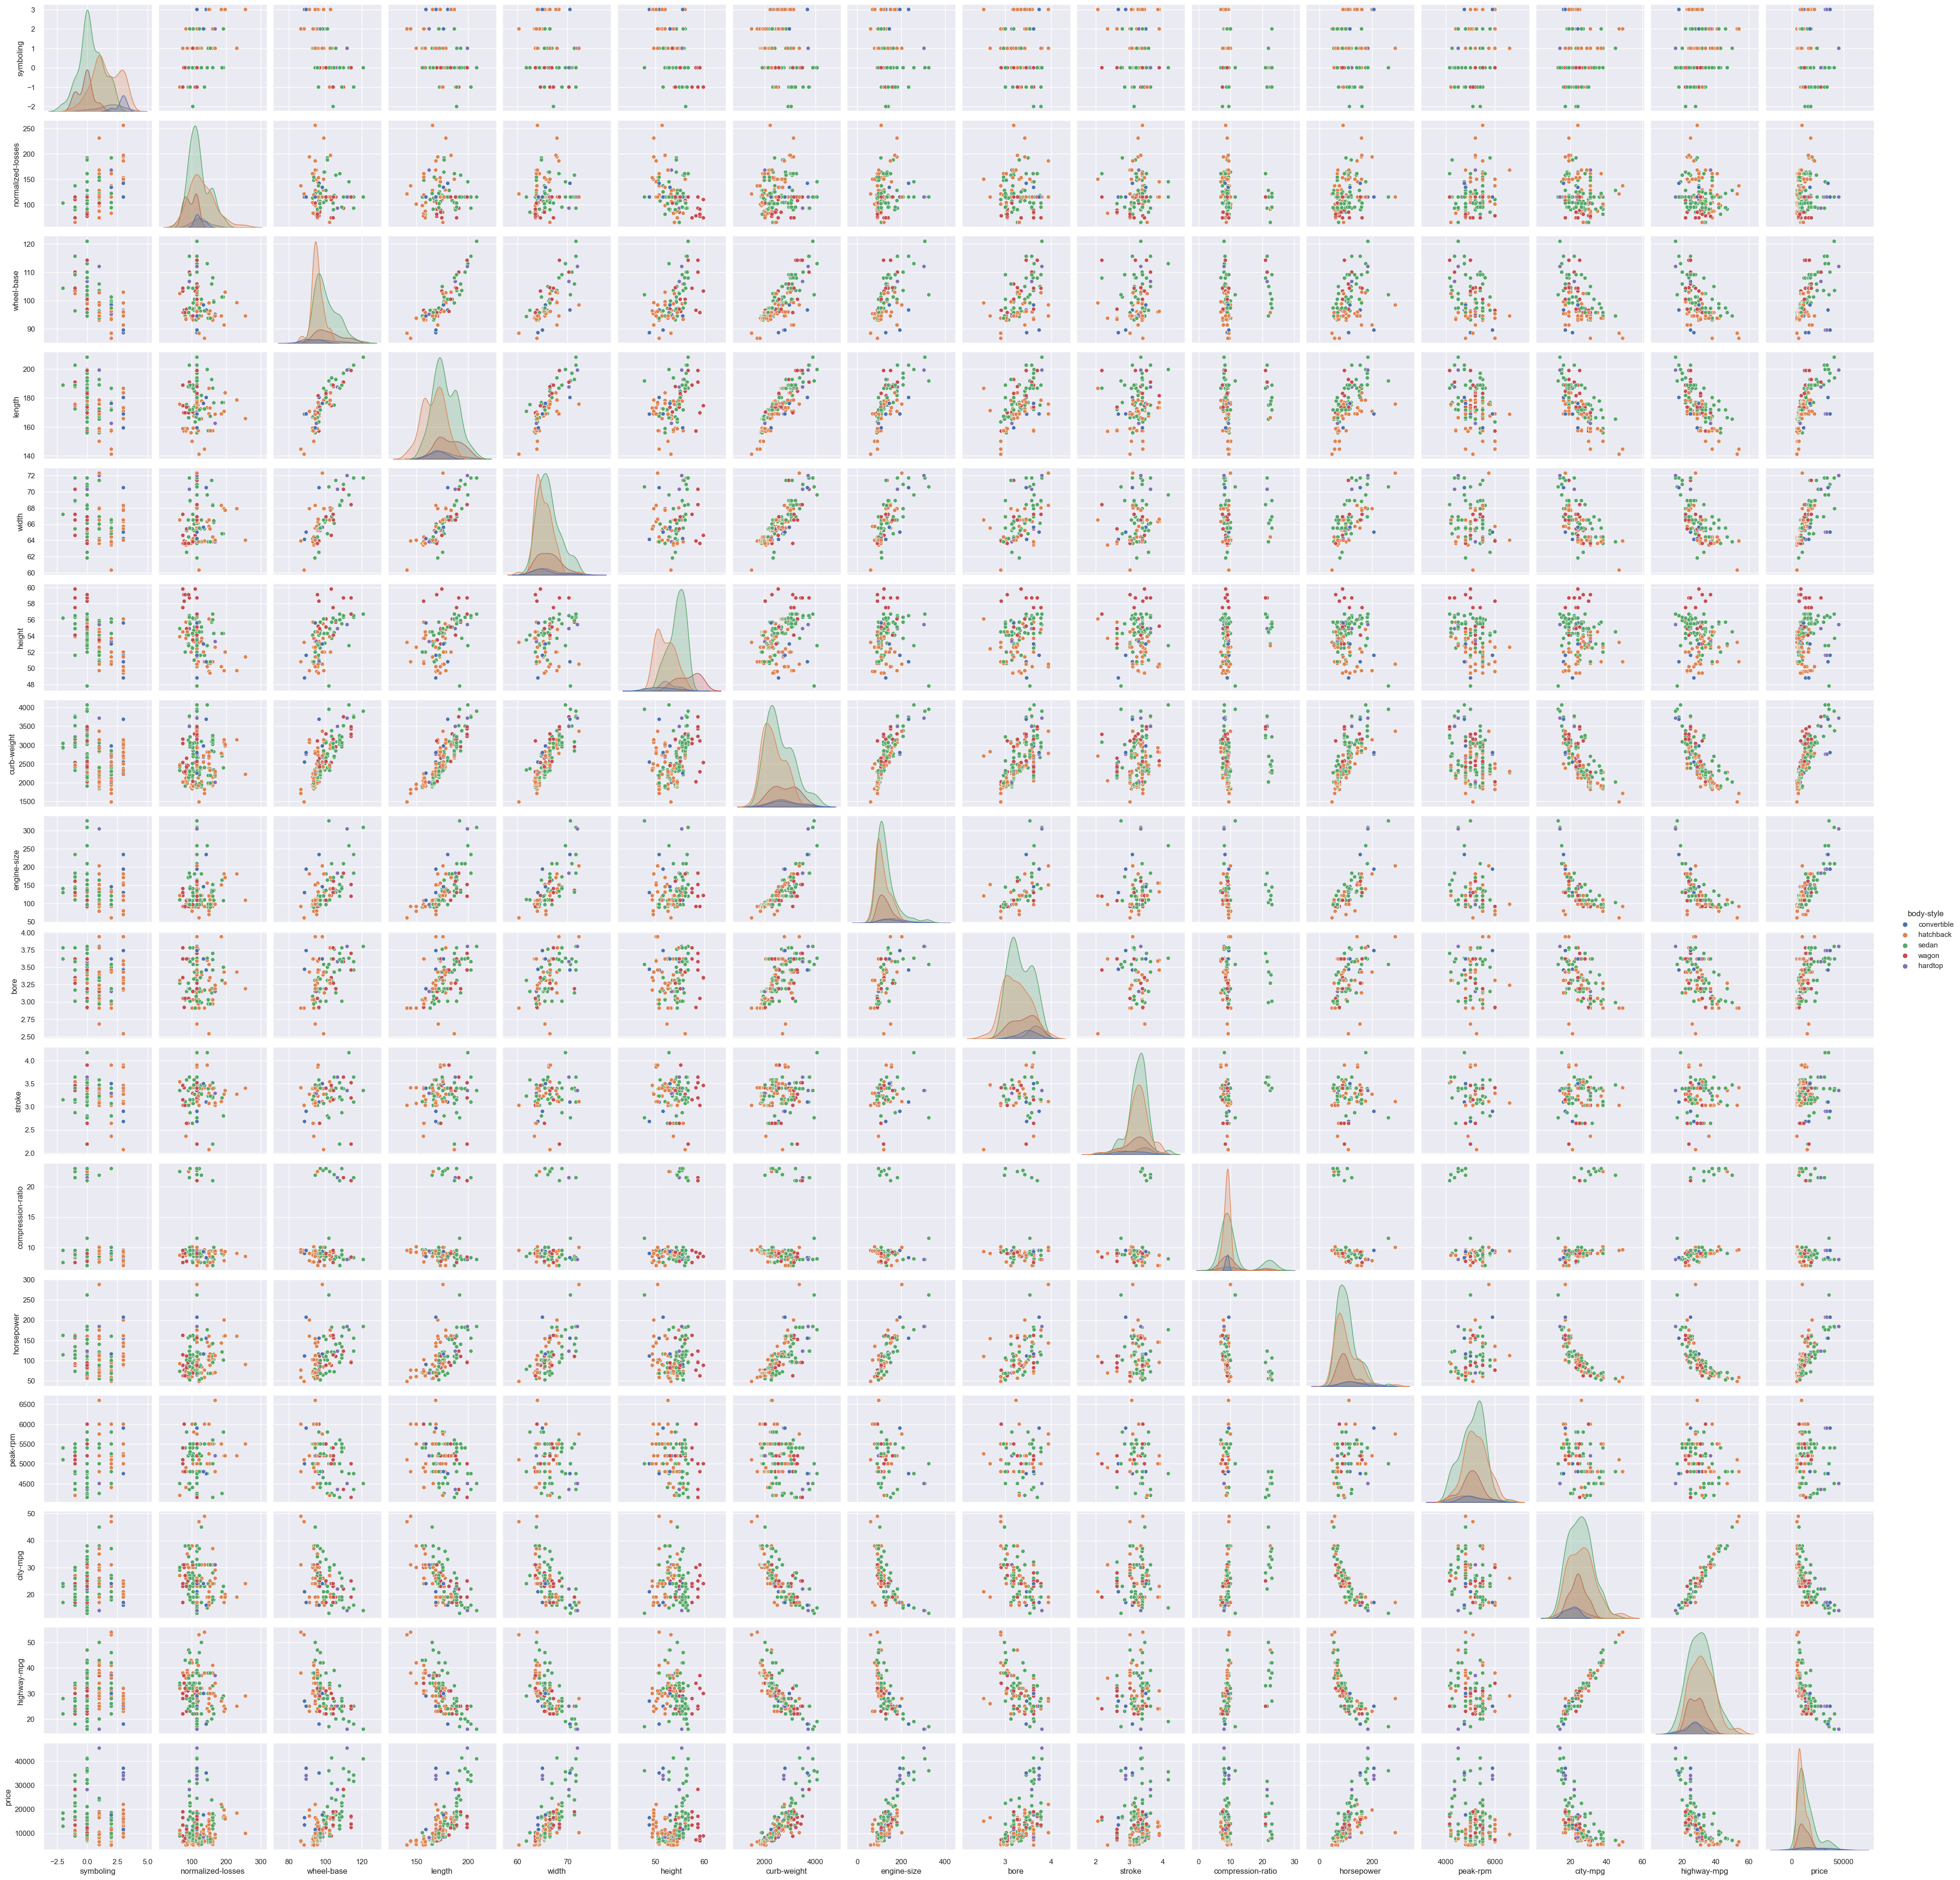

In [35]:
sns.pairplot(data2, hue='body-style')

In [36]:
## Vamos entonces a convertir las variables categoricas a dummies o dicotomicas
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [37]:
## creo una copia del data set
data_transform = data2.copy()

In [38]:
## Aplico Ordinal Encoder a las variables categoricas para mirar su correlación
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

In [39]:
## creo una matriz de correlación
corr = data_transform.corr()

<AxesSubplot:>

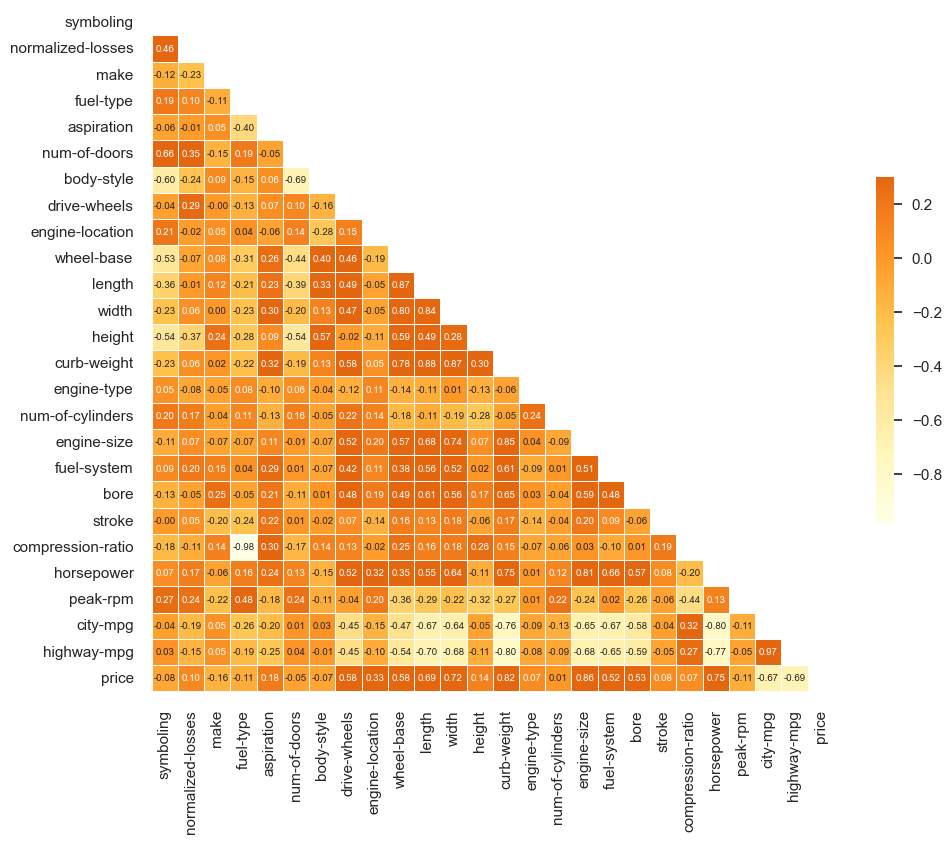

In [40]:
## Grafico el mapa de calor para ver la correlación entre variables 
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, annot=True, annot_kws={'size': 7}, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f')

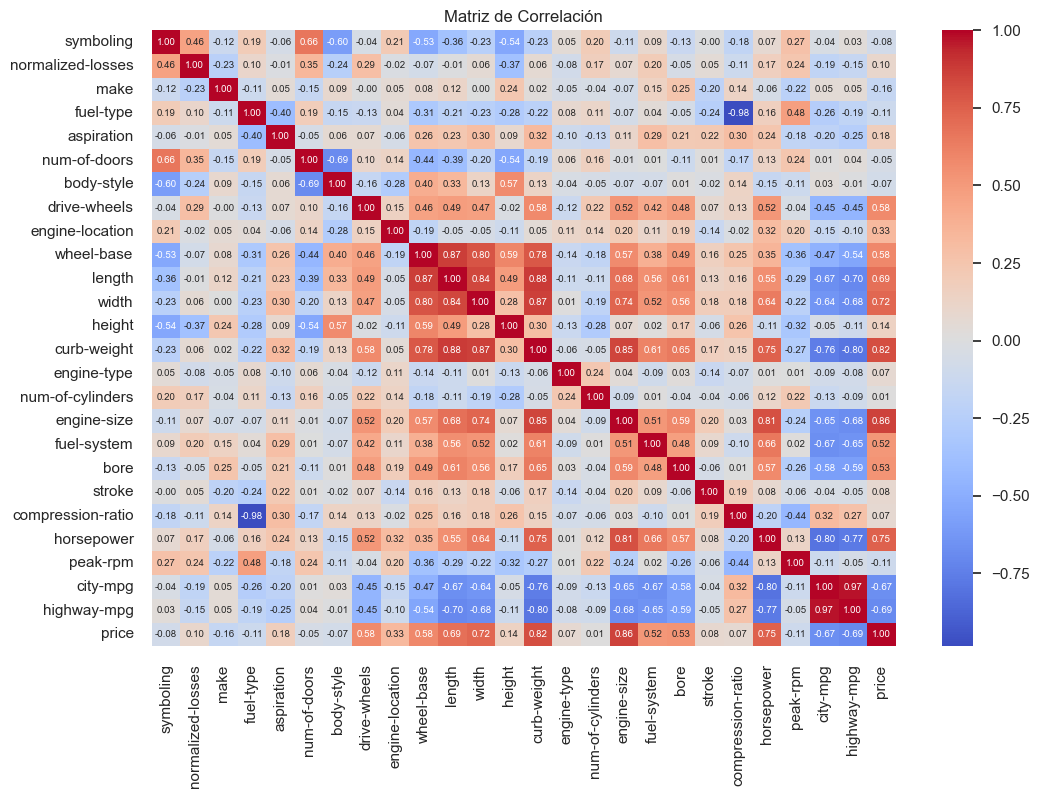

In [41]:
### Visto el mapa de calor de otra manera:

# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", annot_kws={'size': 7}, fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

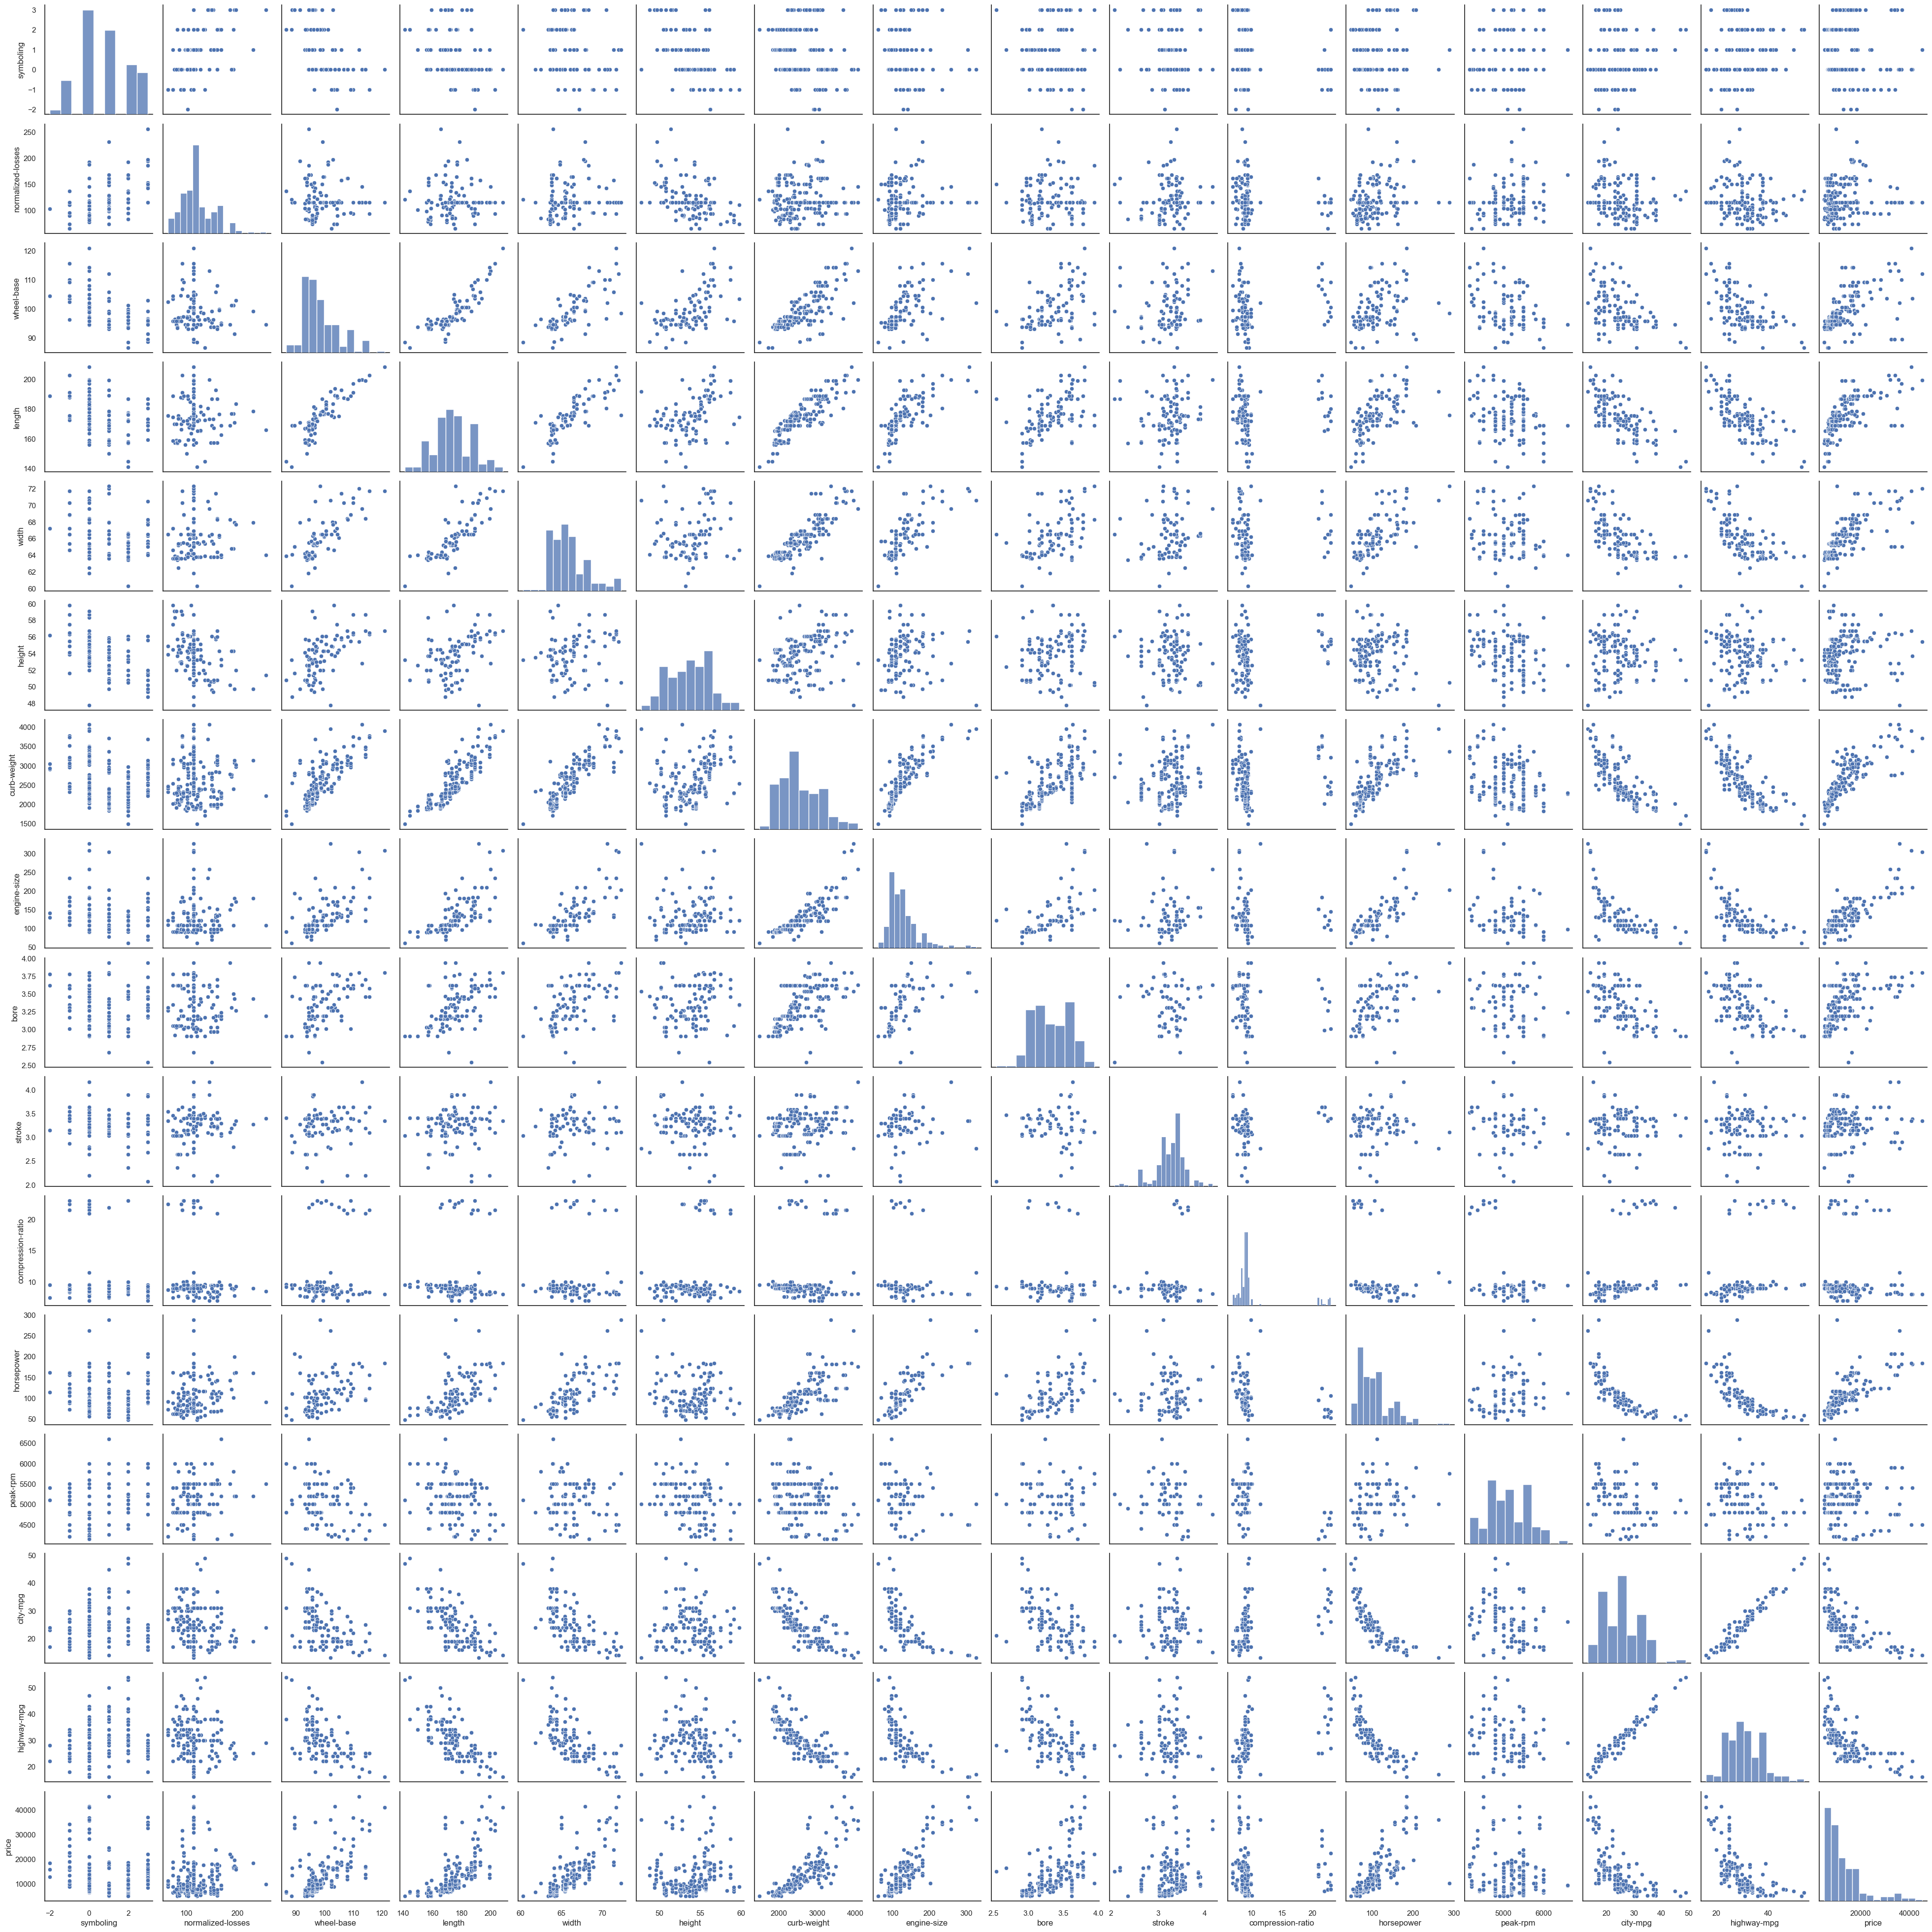

In [42]:
## Hacemos un grafico de dispersión para ver cómo están dispersos los datos 

sns.pairplot(data2)

### **Parte 2 | Modelos Predictivos**

A partir de los datos, se construiran 3 modelos predictivos, para estimar la calificación de riesgo del seguro del automóvil. Se comparan los modelos, con el fin de buscar parámetros óptimos. 

### Modelo 1: KNN

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

X = data2.drop("symboling", axis=1)
y = data2["symboling"]


### Separamos las variables categoricas de las numéricas
categorical_cols = ["make", "fuel-type", "aspiration", "num-of-doors", "body-style",
                    "drive-wheels", "engine-location", "engine-type", "num-of-cylinders",
                    "fuel-system"]

### volvemos dummies las varibales categoricas
X = pd.get_dummies(X, columns=categorical_cols)

numeric_cols = ["normalized-losses", "wheel-base", "length", "width", "height",
                "curb-weight", "engine-size", "bore", "stroke", "compression-ratio",
                "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [68]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)


In [69]:
# Particionamiento del dataset
X_train.shape

(153, 75)

In [46]:
X_train

normalized-losses  wheel-base    length     width    height  curb-weight  \
138          -1.185094   -0.841772 -1.393438 -1.171890 -0.010206    -0.973349   
199          -1.468760    0.922815  1.198549  0.603839  1.548733     1.157921   
110          -0.176503    2.570873  2.019209  1.164596  2.041030     1.683518   
17           -0.176503    1.871697  1.864827  2.332839  1.056437     1.827913   
11            2.250418    0.406756  0.223507 -0.517674  0.235942    -0.309132   
..                 ...         ...       ...       ...       ...          ...   
152          -1.468760   -0.508831 -1.247182 -1.078431  0.317992    -1.040733   
116           1.273346    1.522109  1.027916  1.164596  1.220535     1.340821   
53           -0.239540   -0.941655 -0.589028 -0.798053  0.153893    -1.175502   
38           -0.460170   -0.375655 -0.532151 -0.330755 -0.174305    -0.513210   
47            0.769050    2.371108  2.076087  1.725353 -0.379429     2.907988   

     engine-size      bore    stroke  compression-ratio  ...  \
138    -0.719947  1.075641 -2.864142          -0.288349  ...   
199     0.074449  1.075641 -0.339113          -0.666913  ...   
110     0.604046  1.371723  0.843495           2.740164  ...   
17      1.976184  1.075641  0.427984          -0.540725  ...   
11     -0.455148  0.631520 -1.457797          -0.338824  ...   
..           ...       ...       ...                ...  ...   
152    -0.840310 -1.033937 -0.722662          -0.288349  ...   
116     0.604046  1.371723  0.843495           2.740164  ...   
53     -0.864383 -1.107958 -0.339113          -0.288349  ...   
38     -0.407003 -0.663836  1.035269          -0.288349  ...   
47      3.155742  1.112652  2.921050          -0.515487  ...   

     num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_1bbl  \
138                        0                     0                 0   
199                        0                     0                 0   
110                        0                     0                 0   
17                         0                     0                 0   
11                         0                     0                 0   
..                       ...                   ...               ...   
152                        0                     0                 0   
116                        0                     0                 0   
53                         0                     0                 0   
38                         0                     0                 1   
47                         0                     0                 0   

     fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
138                 1                 0                0                0   
199                 0                 0                0                0   
110                 0                 0                1                0   
17                  0                 0                0                0   
11                  0                 0                0                0   
..                ...               ...              ...              ...   
152                 1                 0                0                0   
116                 0                 0                1                0   
53                  1                 0                0                0   
38                  0                 0                0                0   
47                  0                 0                0                0   

     fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
138                 0                 0                 0  
199                 1                 0                 0  
110                 0                 0                 0  
17                  1                 0                 0  
11                  1                 0                 0  
..                ...               ...               ...  
152                 0                 0              

In [82]:
# Reescalar las variables predictivas para que tengan la misma importancia, meidante un proceso de estandarización.
x = X_train.values
x_std = StandardScaler().fit_transform(x)
X_train_std = pd.DataFrame(x_std)
X_train_std.columns=X.columns[:]

In [83]:
X_train_std.mean(axis=0)


normalized-losses   -1.596399e-17
wheel-base          -2.902544e-17
length               8.707632e-18
width                7.256360e-18
height              -1.995499e-17
                         ...     
fuel-system_idi      4.571507e-17
fuel-system_mfi      0.000000e+00
fuel-system_mpfi    -1.596399e-17
fuel-system_spdi    -5.115734e-17
fuel-system_spfi    -1.055800e-16
Length: 75, dtype: float64

In [87]:
X_train_std.std(axis=0)

normalized-losses    1.003284
wheel-base           1.003284
length               1.003284
width                1.003284
height               1.003284
                       ...   
fuel-system_idi      1.003284
fuel-system_mfi      0.000000
fuel-system_mpfi     1.003284
fuel-system_spdi     1.003284
fuel-system_spfi     1.003284
Length: 75, dtype: float64

In [84]:
# 
x = X_test.values
x_std = StandardScaler().fit_transform(x)
X_test_std = pd.DataFrame(x_std)
X_test_std.columns=X.columns[:]

In [85]:
X_test_std.mean(axis=0)

normalized-losses    8.540177e-18
wheel-base          -6.191628e-17
length               3.416071e-17
width                2.562053e-17
height               2.135044e-17
                         ...     
fuel-system_idi     -9.180690e-17
fuel-system_mfi     -7.365903e-17
fuel-system_mpfi    -3.416071e-17
fuel-system_spdi    -4.270089e-17
fuel-system_spfi     0.000000e+00
Length: 75, dtype: float64

In [86]:
X_test_std.std(axis=0)

normalized-losses    1.009756
wheel-base           1.009756
length               1.009756
width                1.009756
height               1.009756
                       ...   
fuel-system_idi      1.009756
fuel-system_mfi      1.009756
fuel-system_mpfi     1.009756
fuel-system_spdi     1.009756
fuel-system_spfi     0.000000
Length: 75, dtype: float64

In [50]:
# 
x = X_test.values
x_std = StandardScaler().fit_transform(x)
X_test_std = pd.DataFrame(x_std)
X_test_std.columns=X.columns[:]

In [51]:
X_test_std.mean(axis=0)

normalized-losses    8.540177e-18
wheel-base          -6.191628e-17
length               3.416071e-17
width                2.562053e-17
height               2.135044e-17
                         ...     
fuel-system_idi     -9.180690e-17
fuel-system_mfi     -7.365903e-17
fuel-system_mpfi    -3.416071e-17
fuel-system_spdi    -4.270089e-17
fuel-system_spfi     0.000000e+00
Length: 75, dtype: float64

In [52]:
X_test_std.std(axis=0)

normalized-losses    1.009756
wheel-base           1.009756
length               1.009756
width                1.009756
height               1.009756
                       ...   
fuel-system_idi      1.009756
fuel-system_mfi      1.009756
fuel-system_mpfi     1.009756
fuel-system_spdi     1.009756
fuel-system_spfi     0.000000
Length: 75, dtype: float64

In [88]:
# Entrenar varios modelos knn para encontrar el k más apropiado.
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,15,2) # Inicia en 1, termina en 15 y avanza de a 2
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_train_std)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test_std)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

[1.0, 0.7908496732026143, 0.6993464052287581, 0.6470588235294118, 0.6339869281045751, 0.6209150326797386, 0.5751633986928104]
[0.75, 0.5576923076923077, 0.5961538461538461, 0.5, 0.5, 0.5192307692307693, 0.5192307692307693]
[ 1  3  5  7  9 11 13]


In [89]:
# Paso 3: Entrenamiento del modelo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [90]:
# Paso 4: Evaluación del modelo
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 0.5046153846153847


In [91]:
# Paso 5: Ajuste de hiperparámetros y validación cruzada
k_values = [3, 5, 7, 9, 11]
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

best_k = k_values[np.argmin(cv_scores)]
print("Mejor valor de k:", best_k)

Mejor valor de k: 3


In [92]:

# Paso 6: Evaluación final con el conjunto de prueba original
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_final = knn.predict(X_test)
mse_final = mean_squared_error(y_test, y_pred_final)
print("Error cuadrático medio final (MSE):", mse_final)

Error cuadrático medio final (MSE): 0.4572649572649572


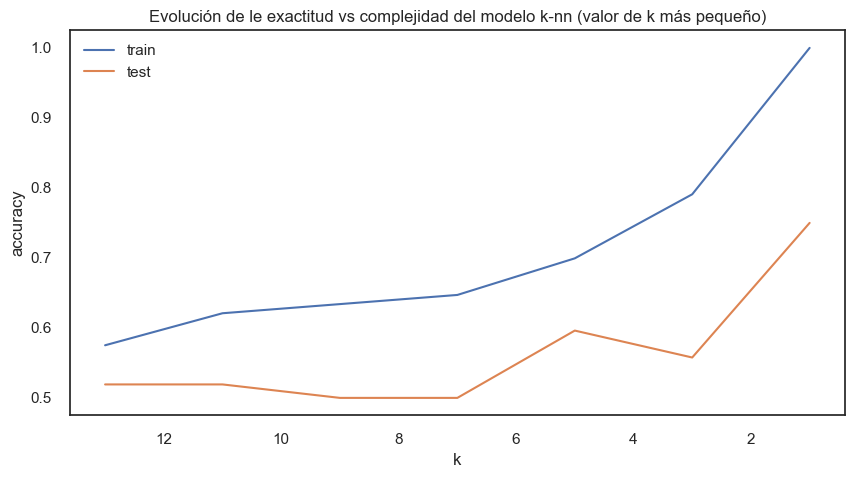

In [93]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [94]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_std, y_train)
y_preds = knn.predict(X_train_std)
print("Clases reales   : ", y_train)
print("Clases predichas: ", y_preds)

Clases reales   :  138    2
199   -1
110    0
17     0
11     0
      ..
152    1
116    0
53     1
38     0
47     0
Name: symboling, Length: 153, dtype: int64
Clases predichas:  [ 2 -1  0  0  0  0  3  1  2  2  0 -1  1  0  1  0  3  0  0 -1  0  1  1  2
  0  0  0  0 -1  0  2  3  1 -1  1  2  0  2  1  0  1  0  1 -1  3  1  0  0
  0  0 -2 -1  0 -1 -1  2  3 -2  2  0  0  1  1  0 -1 -1  1  0  0  1  0  2
  1  1  3  0  0  0  2  3  1  0  3  1 -1  0 -1  2  0  2  2 -1  0 -1  1  1
 -1  1 -1 -1  0  0  0  3  1  0  2  1 -1  0 -1  2  0  2  0  0  0  0  0  0
  1  1  2  1  3  2  1  1  0  2  1 -1  3  1 -1  0  1  2  1  1  3  0  1  1
  0  1 -1  0  0  0  0  0 -1]


In [95]:
# Costruir Matriz de cofusió
cm= metrics.confusion_matrix(y_train, y_preds)
cm

array([[ 1,  0,  0,  0,  0,  0],
       [ 1, 18,  0,  0,  0,  0],
       [ 0,  3, 45,  0,  0,  0],
       [ 0,  1,  8, 29,  0,  0],
       [ 0,  0,  3,  7, 16,  0],
       [ 0,  2,  1,  1,  5, 12]], dtype=int64)

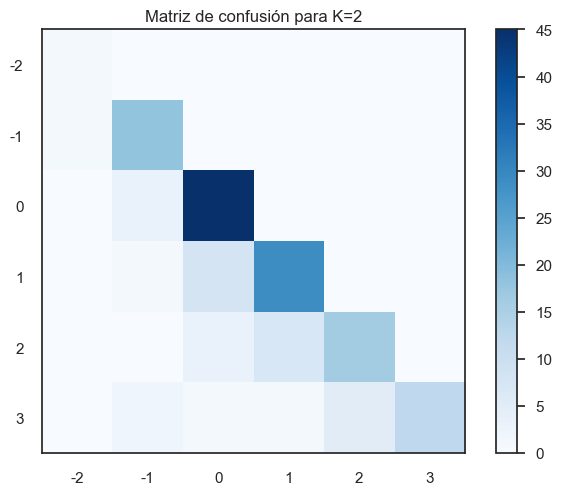

In [96]:
# Obtener los valores únicos de la variable dependiente y
unique_values = np.unique(y)

# Visualizar la matriz de confusión
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=2")
plt.colorbar()
tick_marks = np.arange(len(unique_values))
plt.xticks(tick_marks, unique_values)
plt.yticks(tick_marks, unique_values)

# Mostrar la visualización
plt.show()

In [101]:
### Resultados del Modelo / evaluación modelo KNN


print('Accuracy score: ', accuracy_score(y_train,y_preds))
print('Precision score: ',precision_score(y_train,y_preds,average='macro'))
print('Recall: ', recall_score(y_train,y_preds,average='macro'))
print('F1 score: ',f1_score(y_train,y_preds,average='macro'))
print("Kappa: ", cohen_kappa_score(y_train, y_preds))



Accuracy score:  0.7908496732026143
Precision score:  0.7641937049831787
Recall:  0.8058065837671101
F1 score:  0.7570793250951589
Kappa:  0.7281661207040142


### **Modelo 2: Random Forest**

In [102]:
data_transform

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3              115.0   0.0        1.0         0.0           1.0   
1            3              115.0   0.0        1.0         0.0           1.0   
2            1              115.0   0.0        1.0         0.0           1.0   
3            2              164.0   1.0        1.0         0.0           0.0   
4            2              164.0   1.0        1.0         0.0           0.0   
..         ...                ...   ...        ...         ...           ...   
200         -1               95.0  21.0        1.0         0.0           0.0   
201         -1               95.0  21.0        1.0         1.0           0.0   
202         -1               95.0  21.0        1.0         0.0           0.0   
203         -1               95.0  21.0        0.0         1.0           0.0   
204         -1               95.0  21.0        1.0         1.0           0.0   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0.0           2.0              0.0        88.6  ...        130.0   
1           0.0           2.0              0.0        88.6  ...        130.0   
2           2.0           2.0              0.0        94.5  ...        152.0   
3           3.0           1.0              0.0        99.8  ...        109.0   
4           3.0           0.0              0.0        99.4  ...        136.0   
..          ...           ...              ...         ...  ...          ...   
200         3.0           2.0              0.0       109.1  ...        141.0   
201         3.0           2.0              0.0       109.1  ...        141.0   
202         3.0           2.0              0.0       109.1  ...        173.0   
203         3.0           2.0              0.0       109.1  ...        145.0   
204         3.0           2.0              0.0       109.1  ...        141.0   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0            5.0  3.47    2.68                9.0       111.0    5000.0   
1            5.0  3.47    2.68                9.0       111.0    5000.0   
2            5.0  2.68    3.47                9.0       154.0    5000.0   
3            5.0  3.19    3.40               10.0       102.0    5500.0   
4            5.0  3.19    3.40                8.0       115.0    5500.0   
..           ...   ...     ...                ...         ...       ...   
200          5.0  3.78    3.15                9.5       114.0    5400.0   
201          5.0  3.78    3.15                8.7       160.0    5300.0   
202          5.0  3.58    2.87                8.8       134.0    5500.0   
203          3.0  3.01    3.40               23.0       106.0    4800.0   
204          5.0  3.78    3.15                9.5       114.0    5400.0   

     city-mpg  highway-mpg    price  
0        21.0         27.0  13495.0  
1        21.0         27.0  16500.0  
2        19.0         26.0  16500.0  
3        24.0         30.0  13950.0  
4        18.0         22.0  17450.0  
..        ...          ...      ...  
200      23.0         28.0  16845.0  
201      19.0         25.0  19045.0  
202      18.0         23.0  21485.0  
203      26.0         27.0  22470.0  
204      19.0         25.0  22625.0  

[205 rows x 26 columns]

In [103]:
data_transform.describe()

symboling  normalized-losses        make   fuel-type  aspiration  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         120.600000   12.195122    0.902439    0.180488   
std      1.245307          31.805105    6.274831    0.297446    0.385535   
min     -2.000000          65.000000    0.000000    0.000000    0.000000   
25%      0.000000         101.000000    8.000000    1.000000    0.000000   
50%      1.000000         115.000000   12.000000    1.000000    0.000000   
75%      2.000000         137.000000   19.000000    1.000000    0.000000   
max      3.000000         256.000000   21.000000    1.000000    1.000000   

       num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
count    205.000000  205.000000    205.000000       205.000000  205.000000   
mean       0.434146    2.614634      1.326829         0.014634   98.756585   
std        0.496858    0.859081      0.556171         0.120377    6.021776   
min        0.000000    0.000000      0.000000         0.000000   86.600000   
25%        0.000000    2.000000      1.000000         0.000000   94.500000   
50%        0.000000    3.000000      1.000000         0.000000   97.000000   
75%        1.000000    3.000000      2.000000         0.000000  102.400000   
max        1.000000    4.000000      2.000000         1.000000  120.900000   

       ...  engine-size  fuel-system        bore      stroke  \
count  ...   205.000000   205.000000  205.000000  205.000000   
mean   ...   126.907317     3.253659    3.329366    3.256098   
std    ...    41.642693     2.013204    0.270858    0.313634   
min    ...    61.000000     0.000000    2.540000    2.070000   
25%    ...    97.000000     1.000000    3.150000    3.110000   
50%    ...   120.000000     5.000000    3.310000    3.290000   
75%    ...   141.000000     5.000000    3.580000    3.410000   
max    ...   326.000000     7.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  205.000000   205.000000  205.000000   205.000000   
mean           10.142537  104.165854  5126.097561   25.219512    30.751220   
std             3.972040   39.529733   477.035772    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    205.000000  
mean   13150.307317  
std     7879.121326  
min     5118.000000  
25%     7788.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000  

[8 rows x 26 columns]

In [104]:
data_transform['symboling'] = data_transform['symboling'].astype(str)

In [105]:
# doy valores a las variables 
X = data_transform.drop('symboling',axis=1)
y = data_transform['symboling']

In [106]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [107]:
# Crear una instancia del clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=40)


In [108]:
# Entrenar el clasificador
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [109]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)
y_pred

array(['0', '1', '1', '0', '2', '1', '0', '1', '1', '1', '0', '2', '1',
       '1', '0', '0', '0', '1', '2', '0', '1', '0', '0', '1', '2', '3',
       '1', '0', '3', '0', '1', '3', '2', '1', '0', '2', '2', '1', '0',
       '1', '1'], dtype=object)

In [110]:
# Crea y ajusta el modelo RandomForestClassifier
rf_classifier = RandomForestClassifier(oob_score=True)
rf_classifier.fit(X_train, y_train)

# Obtiene el puntaje out-of-bag
oob_score = rf_classifier.oob_score_
print("Puntaje out-of-bag:", oob_score)

Puntaje out-of-bag: 0.7865853658536586


In [111]:
X.columns[np.argsort(-rf_classifier.feature_importances_)]
ordered_columns = X.columns[np.argsort(-rf_classifier.feature_importances_)]

# Imprimir las características en lista vertical
print ("Organizando las variables en orden de importancia son:")
for column in ordered_columns:
    print(column)

Organizando las variables en orden de importancia son:
normalized-losses
height
wheel-base
make
width
curb-weight
length
price
num-of-doors
bore
body-style
horsepower
city-mpg
highway-mpg
peak-rpm
compression-ratio
stroke
engine-size
num-of-cylinders
fuel-system
engine-type
drive-wheels
aspiration
fuel-type
engine-location


In [112]:
data = data2.copy()

feature = data.drop('symboling',axis=1)
answer = data['symboling'].values.reshape(-1)

In [113]:
le = LabelEncoder()
for column_name in feature.columns:
  if feature[column_name].dtype == object:
    feature[column_name] = le.fit_transform(feature[column_name])
  else:
    pass

answer = le.fit_transform(answer)

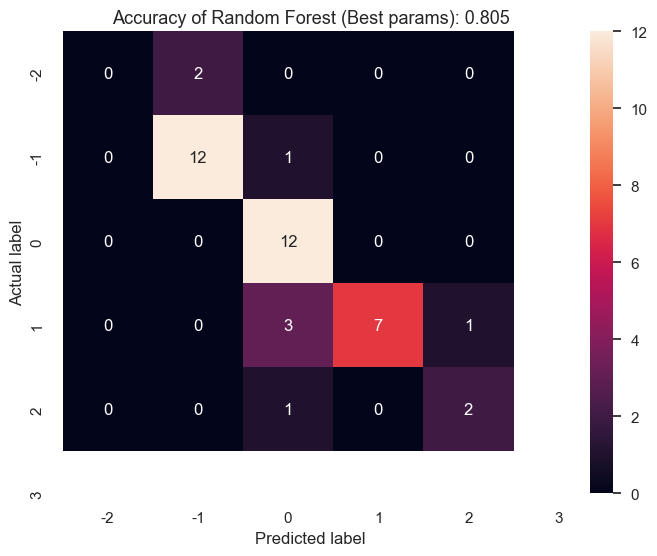

In [114]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Accuracy of Random Forest (Best params): {0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [115]:
### Resultados del Modelo
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print("Kappa: ", cohen_kappa_score(y_test, y_pred))


Accuracy score:  0.8048780487804879
Precision score:  0.64593837535014
Recall:  0.6452214452214452
F1 score:  0.632183908045977
Kappa:  0.728701406120761


 ### **Modelo 3: Gradient Boosting**

In [116]:
gbrt = GradientBoostingClassifier(random_state = 40)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=40)

In [117]:
y_pred = gbrt.predict(X_test)

In [118]:
### Resultados del Modelo
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print("Kappa: ", cohen_kappa_score(y_test, y_pred))


Accuracy score:  0.8292682926829268
Precision score:  0.7180952380952381
Recall:  0.7174825174825175
F1 score:  0.7160439560439561
Kappa:  0.7674230145867099


In [119]:
Accuracy = [0.7908496732026143,0.8048780487804879,0.8292682926829268]
Precision = [0.7641937049831787,0.64593837535014,0.7180952380952381]
Recall =[0.8058065837671101,0.6452214452214452,0.7174825174825175]
F1Score = [0.7570793250951589,0.632183908045977,0.7160439560439561]
Kappa = [0.7281661207040142,0.728701406120761,0.7674230145867099]

result = pd.DataFrame(index=['KNN','RandomForest','Gradient Boosting'])
result['Accuracy'] = Accuracy
result['Precision'] = Precision
result['Recall'] = Recall
result['F1-Score'] = F1Score
result['kappa'] = Kappa

print(result)

                   Accuracy  Precision    Recall  F1-Score     kappa
KNN                0.790850   0.764194  0.805807  0.757079  0.728166
RandomForest       0.804878   0.645938  0.645221  0.632184  0.728701
Gradient Boosting  0.829268   0.718095  0.717483  0.716044  0.767423


### Selección del mejor modelo


De acuerdo a los resultados obtenidos en los 3 modelos construidos para estimar la calificación de riesgo del seguro del automóvil.

Se elije el mejor modelo a partir de los resultados obtenidos en las métricas de evaluación de los modelos:

- **Accuracy:** Mide la proporción de predicciones correctas sobre el total de muestras. En este caso, el modelo de Gradient Boosting tiene la mayor exactitud con un valor de 0.829268, seguido por Random Forest con 0.804878 y KNN con 0.790850.

- **Precision:** Indica la proporción de verdaderos positivos entre todas las predicciones positivas. Aquí, el modelo KNN tiene la mayor precisión con un valor de 0.764194, seguido por Gradient Boosting con 0.718095 y Random Forest con 0.645938.

- **Recall:** Mide la proporción de verdaderos positivos identificados correctamente entre todos los casos positivos reales. En este caso, el modelo KNN tiene el mayor recall con un valor de 0.805807, seguido por Gradient Boosting con 0.717483 y Random Forest con 0.645221.

- **F1-Score:** Es una medida que combina la precisión y el recall en un solo valor. Aquí, el modelo KNN tiene el mayor F1-Score con un valor de 0.757079, seguido por Gradient Boosting con 0.716044 y Random Forest con 0.632184.

- **Kappa:** Mide la concordancia entre las predicciones del modelo y las clases reales, teniendo en cuenta el acuerdo que podría ocurrir por casualidad. En esta métrica, el modelo Gradient Boosting tiene el mayor valor de kappa con 0.767423, seguido por Random Forest con 0.728701 y KNN con 0.728166.

Teniendo en cuenta estas observaciones, el modelo de Gradient Boosting parece tener un rendimiento general sólido, obteniendo buenos resultados en varias métricas de evaluación. 

### Parte 3 | Reducción de dimensionalidad: Análisis de Componentes Principales (ACP/PCA)

En esta sección, se abordará el proceso de reducción de dimensionalidad de las variables independientes del modelo. Es importante destacar que, con el propósito de llevar a cabo un análisis preciso, se considerarán exclusivamente las variables numéricas continuas, por tanto, en el dataframe x_dep se conservarán las variables independientes continuas.

In [120]:
x_dep=data2.drop(['symboling','make','aspiration','num-of-doors','fuel-type', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders','fuel-system'  ], axis = 1)
x_dep

normalized-losses  wheel-base  length  width  height  curb-weight  \
0                115.0        88.6   168.8   64.1    48.8       2548.0   
1                115.0        88.6   168.8   64.1    48.8       2548.0   
2                115.0        94.5   171.2   65.5    52.4       2823.0   
3                164.0        99.8   176.6   66.2    54.3       2337.0   
4                164.0        99.4   176.6   66.4    54.3       2824.0   
..                 ...         ...     ...    ...     ...          ...   
200               95.0       109.1   188.8   68.9    55.5       2952.0   
201               95.0       109.1   188.8   68.8    55.5       3049.0   
202               95.0       109.1   188.8   68.9    55.5       3012.0   
203               95.0       109.1   188.8   68.9    55.5       3217.0   
204               95.0       109.1   188.8   68.9    55.5       3062.0   

     engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          130.0  3.47    2.68                9.0       111.0    5000.0   
1          130.0  3.47    2.68                9.0       111.0    5000.0   
2          152.0  2.68    3.47                9.0       154.0    5000.0   
3          109.0  3.19    3.40               10.0       102.0    5500.0   
4          136.0  3.19    3.40                8.0       115.0    5500.0   
..           ...   ...     ...                ...         ...       ...   
200        141.0  3.78    3.15                9.5       114.0    5400.0   
201        141.0  3.78    3.15                8.7       160.0    5300.0   
202        173.0  3.58    2.87                8.8       134.0    5500.0   
203        145.0  3.01    3.40               23.0       106.0    4800.0   
204        141.0  3.78    3.15                9.5       114.0    5400.0   

     city-mpg  highway-mpg    price  
0        21.0         27.0  13495.0  
1        21.0         27.0  16500.0  
2        19.0         26.0  16500.0  
3        24.0         30.0  13950.0  
4        18.0         22.0  17450.0  
..        ...          ...      ...  
200      23.0         28.0  16845.0  
201      19.0         25.0  19045.0  
202      18.0         23.0  21485.0  
203      26.0         27.0  22470.0  
204      19.0         25.0  22625.0  

[205 rows x 15 columns]

In [121]:
np.var(x_dep)

normalized-losses    1.006630e+03
wheel-base           3.608490e+01
length               1.514662e+02
width                4.579451e+00
height               5.941674e+00
curb-weight          2.697854e+05
engine-size          1.725655e+03
bore                 7.300594e-02
stroke               9.788623e-02
compression-ratio    1.570014e+01
horsepower           1.554977e+03
peak-rpm             2.264531e+05
city-mpg             4.259084e+01
highway-mpg          4.719177e+01
price                6.177772e+07
dtype: float64

Revisando la varianza individual de las variables de x_dep se anota que: **normalized-losses,curb-weight,length,engine-size,peak-rpm,horsepower, y price** presentan una **variabilidad alta**.

Por su parte: **height,city-mpg,highway-mpg,compression-ratio y width** presentan una **variabilidad moderada.**

Finalmente, **bore" y stroke** tienen **varianzas muy bajas.**

In [122]:
### En primer lugar se reazlian 3 procesos para estandarizar el conjunto de variables dependientes:
# Realizar la estandarización de los datos
scaler = StandardScaler()
x_std = scaler.fit_transform(x_dep)

# Crear un DataFrame a partir del array estandarizado
x_std = pd.DataFrame(x_std, columns=x_dep.columns)

# Asignar los nombres de las columnas
x_std.columns = x_dep.columns

En segundo lugar, se procede a utilizar la función PCA proporcionada por la librería sklearn. Se define una función que recibe como parámetros el número de componentes a estimar y el conjunto de datos que contiene la información de las variables dependientes.Además, se define la función **pca_results** que muestra en una tabla en una y en grafico de barras el número de dimensiones que se especifique, donde muestra el % de varianza explicada de cada dimensión y el aporte de cada variable original en cada dimensión.

In [123]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    
    return pca, X_pca

In [124]:
def pca_results(full_dataset, pca, plot=True):
    '''
Crear un DataFrame con los resultados del PCA
Incluye los pesos de las características de las dimensiones y la varianza explicada
Visualiza los resultados del PCA
    '''

    # Indexación de dimensiones
    dimensions = dimensions = \
    ['Componente {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # Componenentesdel PCA
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # Varianza explicada del PCA
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Varianza explicada'])
    variance_ratios.index = dimensions

    if plot:
        # Crear una visualización de gráfico de barras
        fig, ax = plt.subplots(figsize = (14,8))

        # Graficar los pesos de las características (variables) como una función de los componentes
        components.plot(ax = ax, kind = 'bar');
        ax.set_ylabel("Peso de las características")
        ax.set_xticklabels(dimensions, rotation=0)

        # Mostrar las razones de varianza explicadas
        for i, ev in enumerate(pca.explained_variance_ratio_):
            ax.text(i-0.40, ax.get_ylim()[1] + 0.05, 
                    "Varianza explicada\n          %.4f"%(ev))

    # Devolver un DataFrame concatenado 
    return pd.concat([variance_ratios, components], axis = 1)

In [125]:
print('Número de componentes :   Varianza explicada')
for component_count in range(1,16):
    pca, X_pca = do_pca(component_count, x_std)
    results = pca_results(x_std, pca, False)
    print('{:20} :   {:2.1%}'.format(component_count,
                                     results['Varianza explicada'].sum()))

Número de componentes :   Varianza explicada
                   1 :   49.2%
                   2 :   65.8%
                   3 :   74.2%
                   4 :   80.2%
                   5 :   85.7%
                   6 :   89.6%
                   7 :   92.5%
                   8 :   94.6%
                   9 :   96.5%
                  10 :   97.7%
                  11 :   98.5%
                  12 :   99.1%
                  13 :   99.6%
                  14 :   99.9%
                  15 :   100.0%


Los resultados del análisis de componentes principales (PCA) revelan que la totalidad de la varianza puede ser explicada hasta el componente 15. Sin embargo, es importante destacar que el 80,3% de la varianza es explicado hasta el componente 4, y se logra explicar el 85,7% de la varianza al incluir el componente 5.

Componente 1  Componente 2  Componente 3  Componente 4  \
Varianza explicada        0.4923        0.1655        0.0845        0.0594   
normalized-losses         0.0246       -0.3135       -0.3943       -0.0511   
wheel-base                0.2886        0.2785        0.0419       -0.2683   
length                    0.3306        0.1580        0.0616       -0.1823   
width                     0.3272        0.0863       -0.0988       -0.0812   
height                    0.1055        0.4302        0.3693       -0.4065   
curb-weight               0.3557        0.0504       -0.0644        0.0185   
engine-size               0.3213       -0.0481       -0.1681        0.2431   
bore                      0.2630        0.0123        0.1852        0.3696   
stroke                    0.0532        0.0668       -0.6486       -0.4384   
compression-ratio         0.0150        0.4504       -0.3879        0.1910   
horsepower                0.2950       -0.2803       -0.0443        0.1492   
peak-rpm                 -0.0771       -0.4432        0.0790       -0.4683   
city-mpg                 -0.3061        0.2662       -0.1377        0.1245   
highway-mpg              -0.3164        0.2137       -0.1407        0.1306   
price                     0.3160       -0.0537       -0.0897        0.1465   

                    Componente 5  
Varianza explicada        0.0551  
normalized-losses         0.7658  
wheel-base                0.1627  
length                    0.1287  
width                     0.0892  
height                    0.1145  
curb-weight               0.0299  
engine-size              -0.1650  
bore                     -0.0723  
stroke                   -0.4932  
compression-ratio         0.2114  
horsepower               -0.1632  
peak-rpm                  0.0230  
city-mpg                  0.0270  
highway-mpg               0.0170  
price                    -0.0049

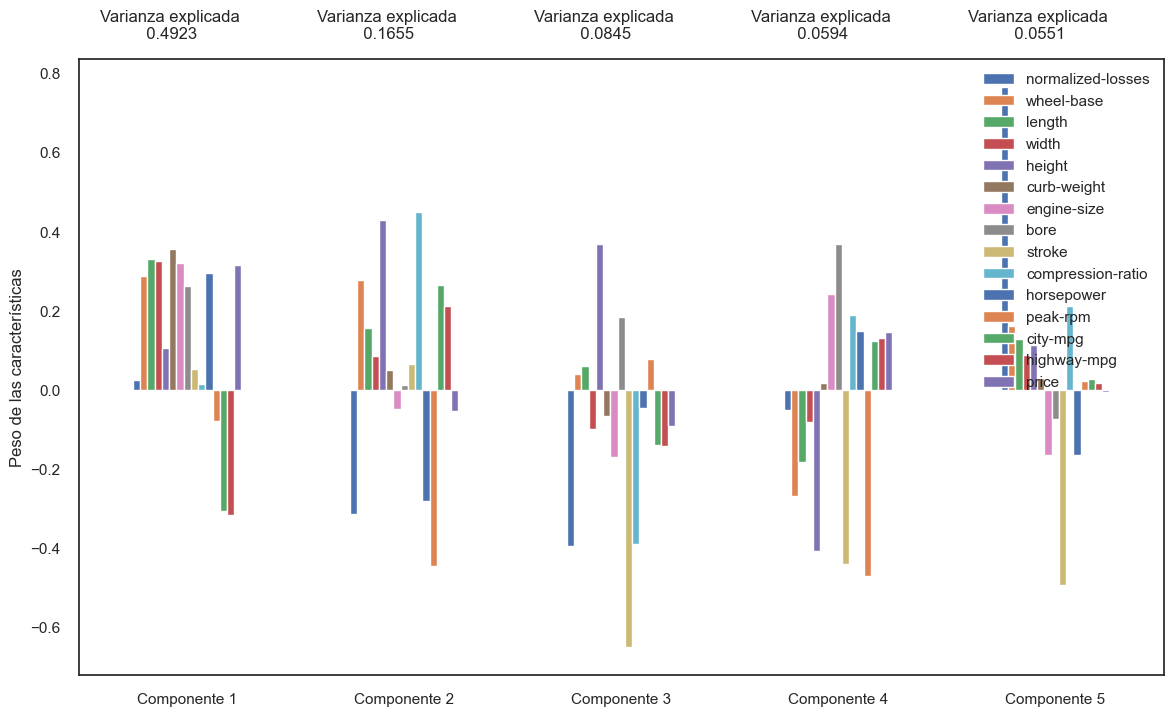

In [126]:
# Análisis PCA con la función pca_results de las primeras 5 dimensiones
pca, X_pca = do_pca( 5,x_std )
pca_results(x_std, pca).T

Zoom y conclusión de las primeras 4 componenetes del PCA

In [127]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(x_std)

In [128]:
component_loadings = pca.components_

In [129]:
# Crea un DataFrame para mostrar el peso de las variables en cada componente

component_labels = [f'Componente {i+1}' for i in range(len(component_loadings))]
variable_labels = x_std.columns.values
loadings_df = pd.DataFrame(component_loadings.T, columns=component_labels, index=variable_labels)
print(loadings_df)

                   Componente 1  Componente 2  Componente 3  Componente 4
normalized-losses      0.024555     -0.313466     -0.394250     -0.051087
wheel-base             0.288624      0.278518      0.041884     -0.268315
length                 0.330576      0.157969      0.061577     -0.182301
width                  0.327169      0.086288     -0.098773     -0.081199
height                 0.105526      0.430207      0.369331     -0.406543
curb-weight            0.355731      0.050386     -0.064437      0.018503
engine-size            0.321335     -0.048052     -0.168119      0.243077
bore                   0.263017      0.012266      0.185223      0.369609
stroke                 0.053210      0.066751     -0.648613     -0.438429
compression-ratio      0.015023      0.450351     -0.387890      0.190967
horsepower             0.294992     -0.280340     -0.044338      0.149223
peak-rpm              -0.077136     -0.443202      0.078976     -0.468263
city-mpg              -0.306107      0

Con base en los resultados obtenidos, se ha tomado la decisión de retener únicamente los cuatro primeros componentes del análisis de componentes principales (PCA). Esta elección se fundamenta en el hecho de que estos cuatro componentes permiten explicar aproximadamente el 80% de la varianza total presente en los datos.

Es importante destacar que hasta el componente 4, todas las variables originales contribuyen con su peso en al menos uno de estos componentes. Esto indica que las variables originales seleccionadas desempeñan un papel significativo en la estructura de los primeros componentes y, por lo tanto, son relevantes para explicar la variabilidad en los datos. La inclusión de todas estas variables contribuye a una representación más completa y precisa de la información subyacente en los datos.

#### - Componente 1:

**Variables con cargas altas y positivas**: length, width, curb-weight, engine-size, horsepower, price.

Este componente principal puede estar relacionado con el tamaño y la potencia del automóvil, así como con su precio.

#### - Componente 2:

**Variables con cargas altas y positivas**: height, city-mpg, highway-mpg.

Este componente principal puede estar relacionado con la eficiencia y las dimensiones del automóvil.

#### - Componente 3:

 **Variables con cargas altas y positivas**: compression-ratio, bore.
 
 **Variables con cargas altas y negativas**: stroke.

Este componente principal puede estar relacionado con características específicas del motor, como la relación de compresión, el diámetro del cilindro y la longitud de carrera del pistón.

#### - Componente 4:

**Variables con cargas altas y negativas**: height, peak-rpm.

Este componente principal puede estar relacionado con la altura del automóvil y la velocidad máxima del motor.

##  Parte 4 | Caracterización de los autos: Clustering

### Usando K-Means

In [144]:
!pip install yellowbrick
!pip install kneed

In [145]:
## Creando el dataframe de los 4 componenetes principales:
c4_pca=pd.DataFrame(X_pca)
c4_pca.columns=['PC1', 'PC2', 'PC3', 'PC4']
c4_pca

PC1       PC2       PC3       PC4
0   -0.613497 -1.898040  0.834018  2.397382
1   -0.492696 -1.918566  0.799743  2.453389
2    0.410542 -1.206846 -0.954423 -0.442866
3   -0.130999 -0.638105 -0.629453 -1.171783
4    1.302979 -1.469815 -0.379537 -1.234735
..        ...       ...       ...       ...
200  2.614892  0.776361  1.175851 -0.476258
201  3.437552  0.185428  1.299146 -0.327450
202  3.443286 -0.029701  1.699837 -0.328537
203  2.340361  3.018699 -1.438465 -0.493220
204  3.248366  0.491083  1.242086 -0.497975

[205 rows x 4 columns]

#### Elección de **K** según el criterio del **CODO**

Elección del último valor de K que implica una reducción “considerable” del WSS del clustering

In [132]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(c4_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Número Optimo de Clusters", n_clusters)

Número Optimo de Clusters 7


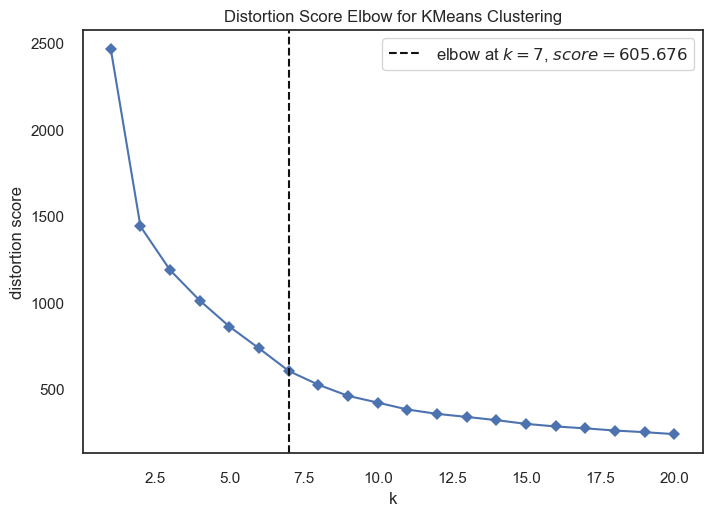

Número Optimo de Clusters: 7


In [133]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(c4_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Número Optimo de Clusters:", n_clusters)

In [134]:
#Preparativos para realizar gráficos
evr = pca.explained_variance_ratio_
evr

array([0.49229284, 0.165452  , 0.08452761, 0.05935978])

In [135]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(x_std)
scores_pca = pca.transform(x_std)

Number of components: 4


In [136]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(c4_pca);

In [137]:
### Dataset completo añadiend Componenetes y Cluster asignado
df_seg_pca_kmeans = pd.concat([x_dep.reset_index(drop=True), pd.DataFrame(c4_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Componente " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0              115.0        88.6   168.8   64.1    48.8       2548.0   
1              115.0        88.6   168.8   64.1    48.8       2548.0   
2              115.0        94.5   171.2   65.5    52.4       2823.0   
3              164.0        99.8   176.6   66.2    54.3       2337.0   
4              164.0        99.4   176.6   66.4    54.3       2824.0   

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        130.0  3.47    2.68                9.0       111.0    5000.0   
1        130.0  3.47    2.68                9.0       111.0    5000.0   
2        152.0  2.68    3.47                9.0       154.0    5000.0   
3        109.0  3.19    3.40               10.0       102.0    5500.0   
4        136.0  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  Componente 1  Componente 2  Componente 3  \
0      21.0         27.0  13495.0     -0.613497     -1.898040      0.834018   
1      21.0         27.0  16500.0     -0.492696     -1.918566      0.799743   
2      19.0         26.0  16500.0      0.410542     -1.206846     -0.954423   
3      24.0         30.0  13950.0     -0.130999     -0.638105     -0.629453   
4      18.0         22.0  17450.0      1.302979     -1.469815     -0.379537   

   Componente 4  Cluster  
0      2.397382        3  
1      2.453389        3  
2     -0.442866        3  
3     -1.171783        3  
4     -1.234735        3

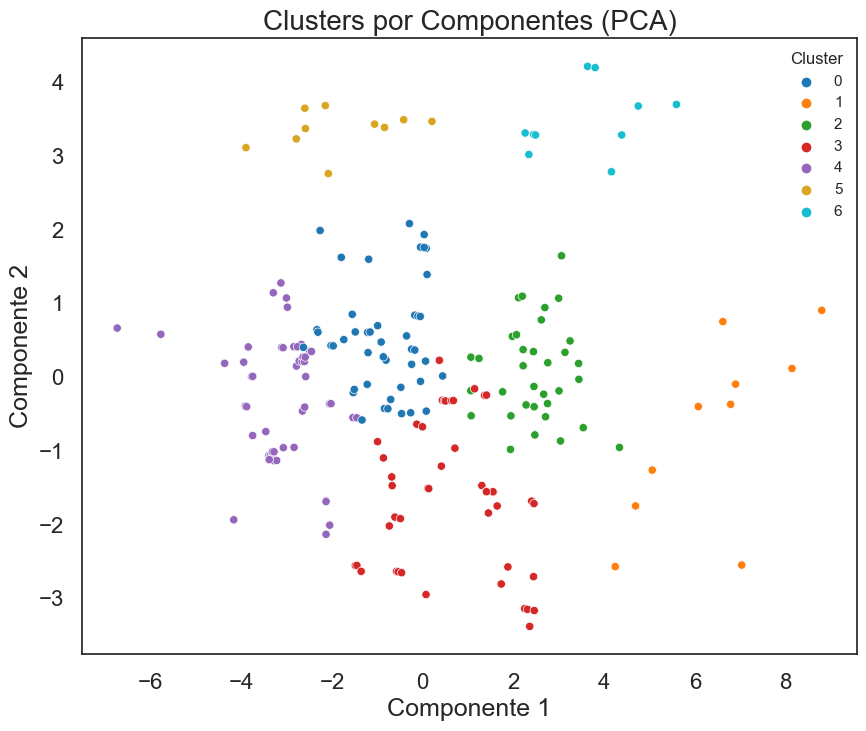

In [138]:
x = df_seg_pca_kmeans['Componente 1']
y = df_seg_pca_kmeans['Componente 2']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters por Componentes (PCA)', fontsize=20)
plt.xlabel("Componente 1", fontsize=18)
plt.ylabel("Componente 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Elección de **K** según el criterio de **SHILHOUETTE**

In [147]:
range_n_clusters = [2,3, 4, 5, 6,7]

For n_clusters = 2 The average silhouette_score is : 0.3699952361621202
For n_clusters = 3 The average silhouette_score is : 0.25797581462425945
For n_clusters = 4 The average silhouette_score is : 0.25426514455038723
For n_clusters = 5 The average silhouette_score is : 0.2781690478682443
For n_clusters = 6 The average silhouette_score is : 0.31146801739420044
For n_clusters = 7 The average silhouette_score is : 0.3293218730747043


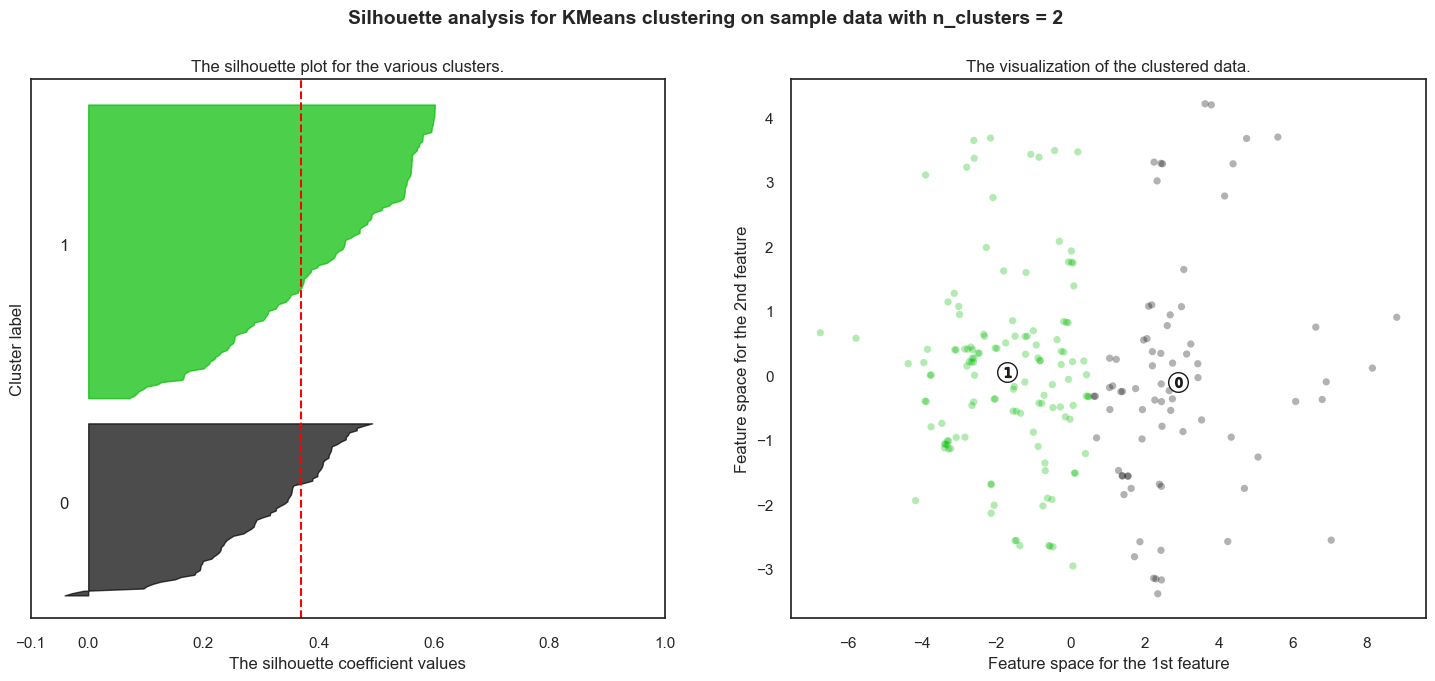

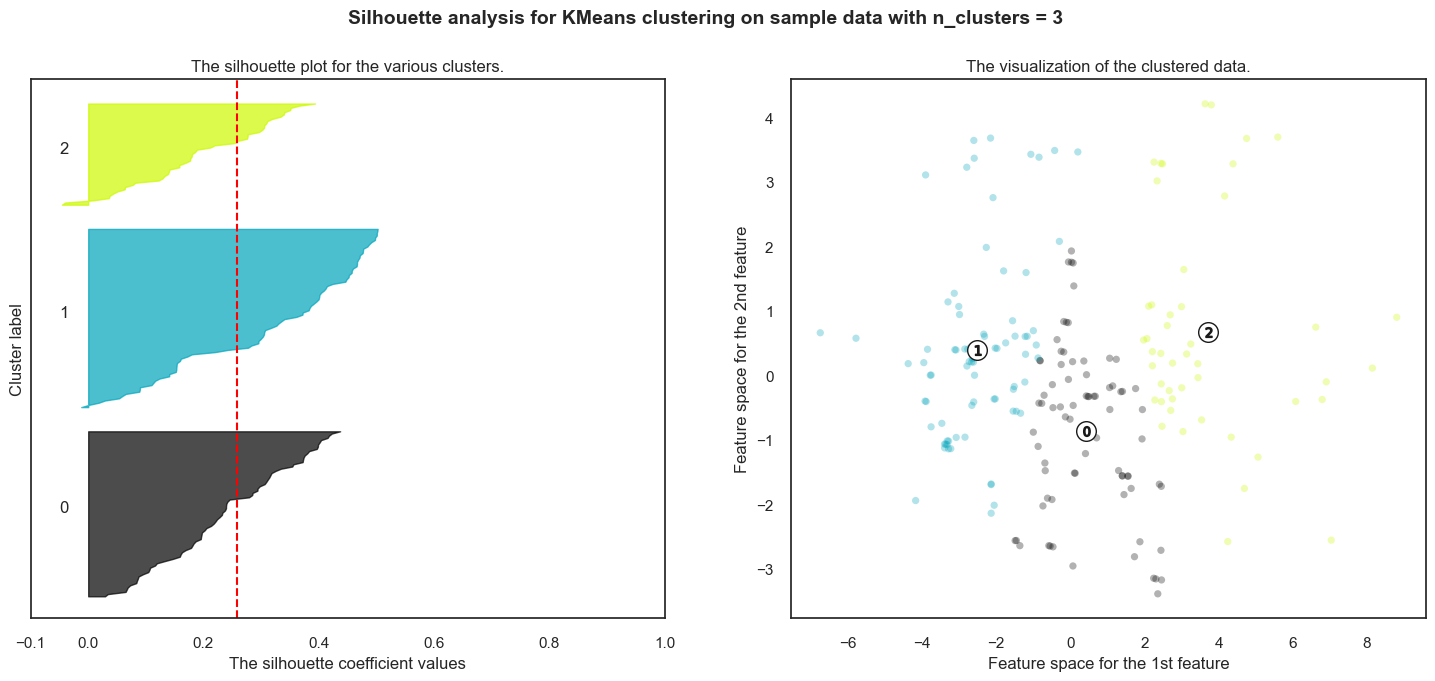

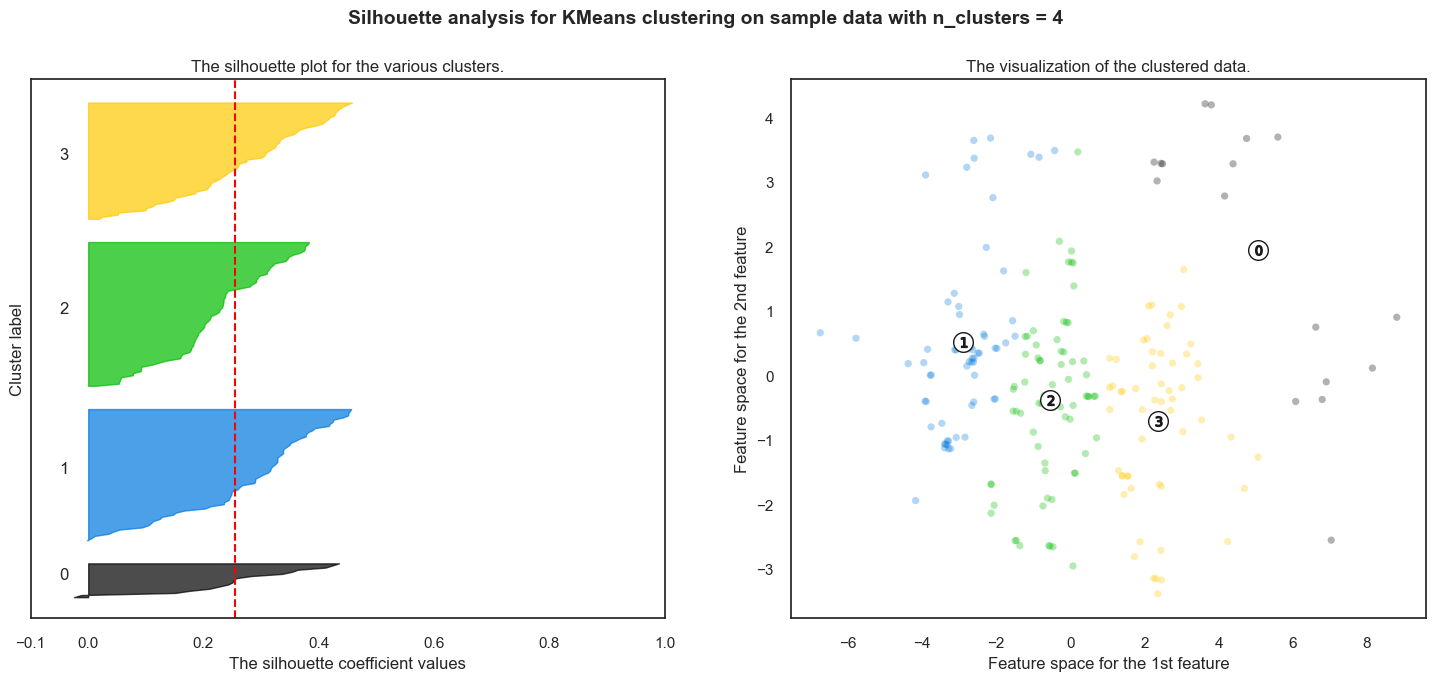

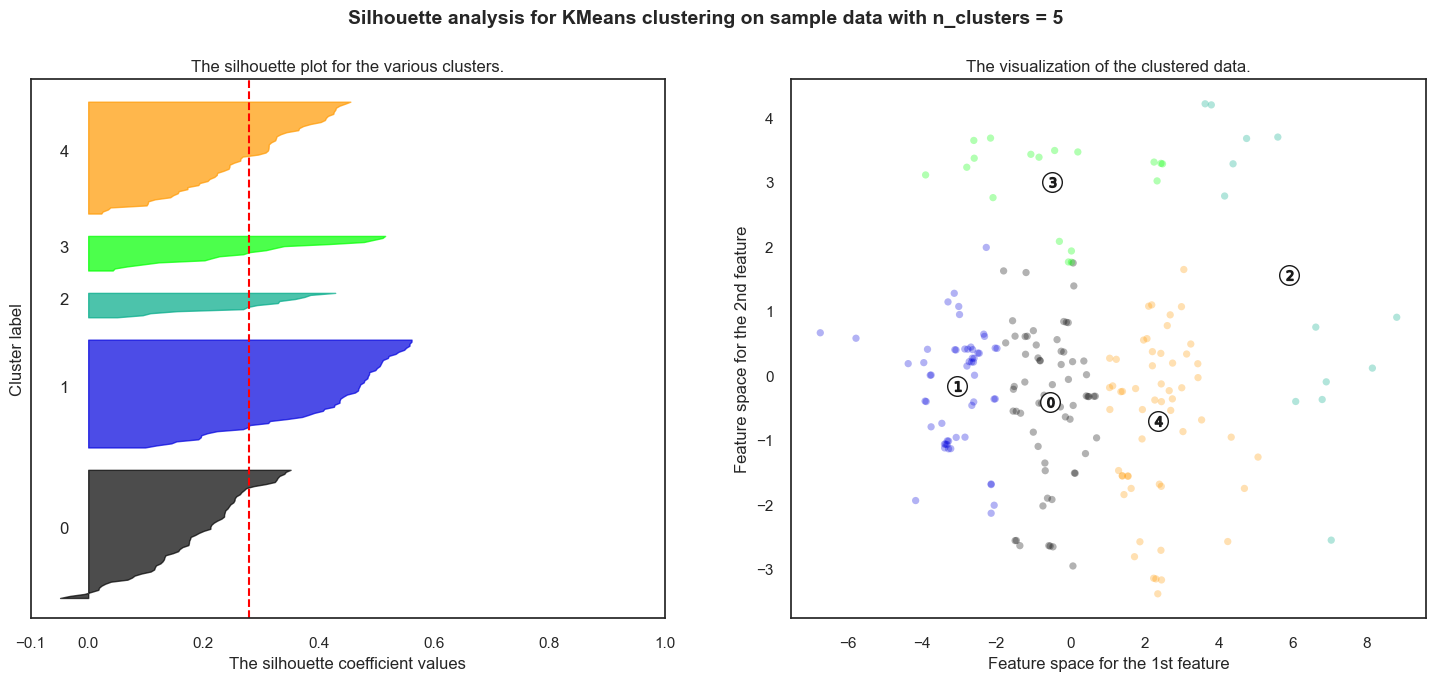

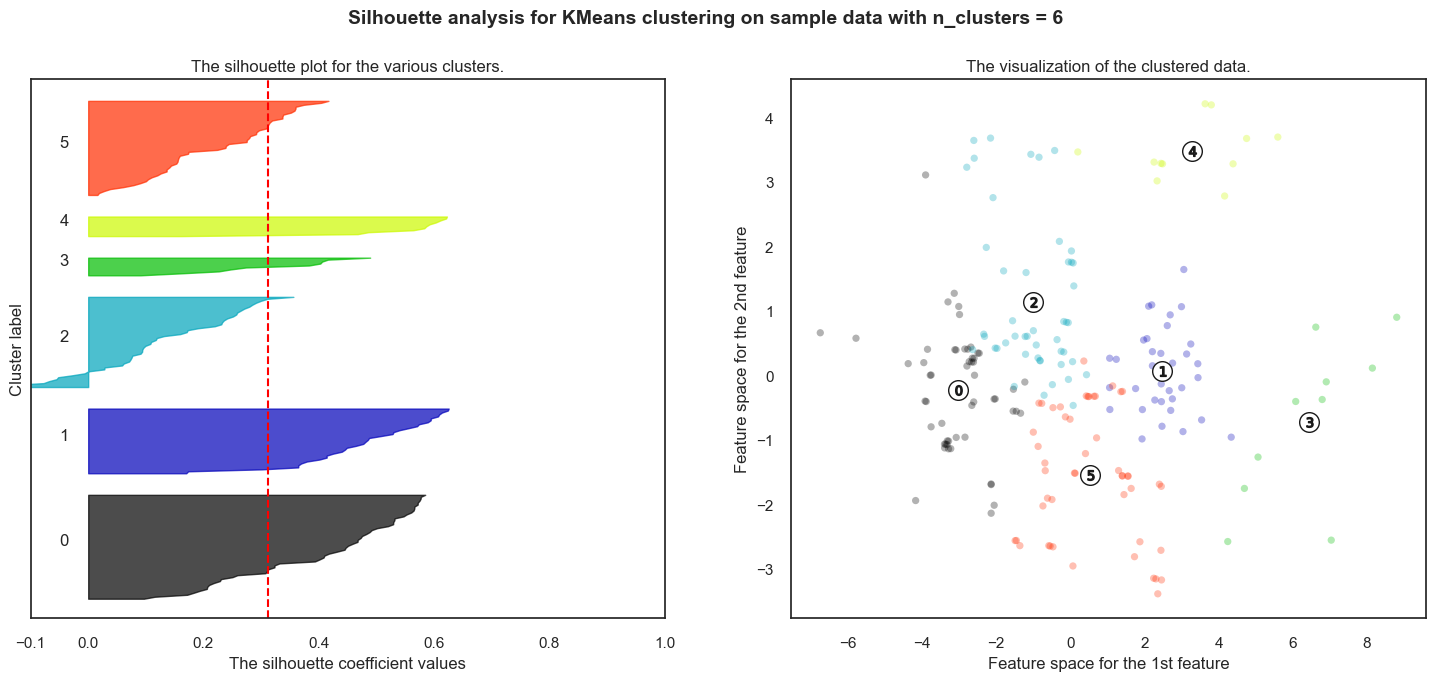

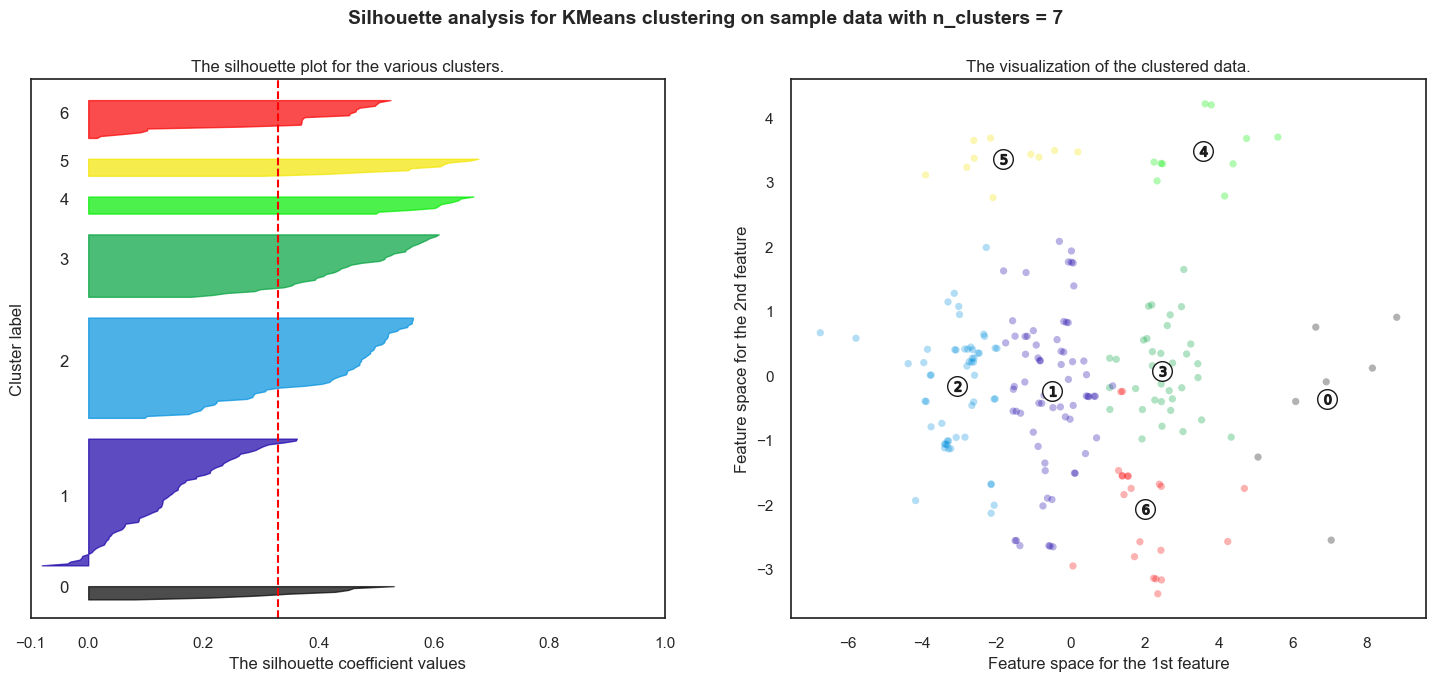

In [148]:
for n_clusters in range_n_clusters:
    # Crear una subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El 1st subplot es para la silhouette-plot
    # Esta puede tomar valores entre -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # El(n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
    # plots de los lusters individuales, para demarcarlos claramente
    ax1.set_ylim([0, len(c4_pca) + (n_clusters + 1) * 10])

   
    # semilla igual a 10 para reproducicibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(c4_pca)

    # El silhouette_score da el valor promedio de todas los cluster,para cada grupo de clusters según el K analizado.
    # Se eligue el del mayor valor
   
    silhouette_avg = silhouette_score(c4_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcula the silhouette scores para cada muestra
    sample_silhouette_values = silhouette_samples(c4_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agrega los silhouette scores para cada cluster de cada K
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcula el nuevo 'y_lower' para el próximo plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La linea vertical para comparar el silhouette score de todos los clusters de todos los K 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Borrar las etiquetas del eje Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot muestra los clusters formados con cada K
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(c4_pca['PC1'], c4_pca['PC2'], marker='.', s=110, lw=0, alpha=0.3,
                c=colors, edgecolor='k')

    # nombrando los clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Elección de **K** según el criterio de **Calinski-Harabasz**


In [149]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_std)
    CH = calinski_harabasz_score(x_std, km.labels_) 
    CHs.append(CH)
    
CHs

[101.80603954692735,
 74.07638846947077,
 62.45631086664955,
 57.42146617786852,
 54.60389095781621,
 55.92113700773058,
 55.23740316437623,
 52.604895997017245,
 51.67206576552289,
 51.10871948149381,
 49.08512137429849,
 48.36563115346104,
 46.89797924034626]

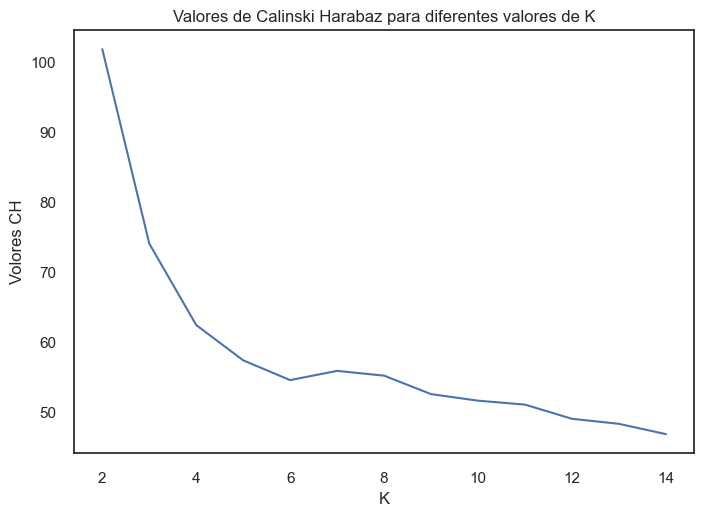

In [150]:
plt.plot(range(2, 15), CHs)
plt.title("Valores de Calinski Harabaz para diferentes valores de K")
plt.ylabel("Volores CH")
plt.xlabel("K")
plt.show()

### CONCLUSIÓN

Utilizando el algoritmo de K-means para determinar los clusters, los métodos de validación para la selección de K no llegan a conclusiones definitivas. Según el método del **CODO**, el valor óptimo de K, donde la curva muestra una disminución significativa en el WSS (suma de los cuadrados dentro de los clusters) y se vuelve aproximadamente lineal, es 7.

Por otro lado, de acuerdo con el método de **Calinski-Harabasz**, que busca maximizar la relación entre la varianza inter-cluster y la varianza intra-cluster, el valor óptimo de K sería 2.

Sin embargo, el método de la **Silhouette** es más inconsistente. En todos los valores de K evaluados (de 2 a 7), se observan clusters con valores negativos de silueta, lo que indica que algunas observaciones fueron asignadas incorrectamente a sus clusters y estarían mejor ubicadas en otros clusters. A pesar de esto, es importante mencionar que el valor promedio del puntaje de silueta con K=2 es el más alto (0,36), seguido por el obtenido con K=7 (0,33).

Es necesario destacar que la distribución de los datos es bastante peculiar, con una "nube de puntos" en el centro y valores más alejados de este centro que se agrupan de manera más clara. El problema radica en la nube central, donde es más difícil determinar a qué cluster pertenecen los puntos.

Teniendo esto en cuenta y revisando nuevamente los resultados, el método del **CODO**, que busca minimizar la variación intra-cluster, segmenta los datos en más clusters, con un valor óptimo de K igual a 7. Por otro lado, el método **CH** es más conservador y divide los datos en 2 clusters. Al considerar las siluetas, a pesar de los problemas de clasificación, la opción más sólida sería K=2, ya que ofrece el mejor valor promedio del puntaje de silueta, los clusters con este K no están muy desequilibrados (a diferencia de los demás valores de K) y parece haber menos errores de clasificación. En conclusión, utilizando K-means, el valor "óptimo" para K es 2.

### Cluster Usando K-Means con K=2

In [151]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(c4_pca)
clusters = kmeans.labels_

In [152]:
c4_pca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 129, 0: 76})


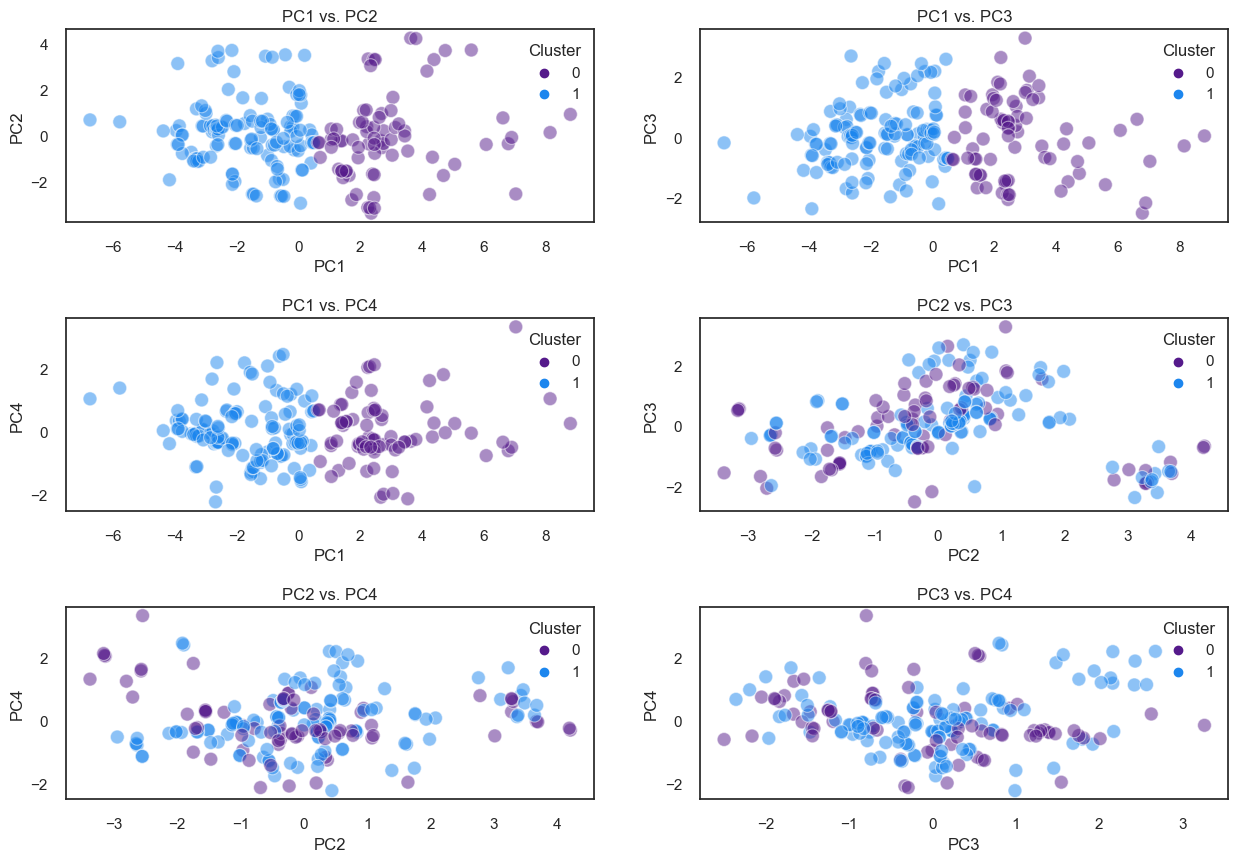

In [153]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["#551A8B", "#1C86EE",]
ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=c4_pca, ax=ax, palette=colorPalette,  s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=c4_pca, ax=ax,palette=colorPalette,  s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x="PC1", y="PC4", hue="Cluster", data=c4_pca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC4")
ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=c4_pca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x="PC2", y="PC4", hue="Cluster", data=c4_pca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC4")
ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x="PC3", y="PC4", hue="Cluster", data=c4_pca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC3 vs. PC4")

plt.subplots_adjust(hspace=0.5)
plt.show()